<a href="https://colab.research.google.com/github/ahcamachod/1922-clustering-kmeans-dbscan-meanshift/blob/main/clustering_kmeans_dbscan_meanshift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering: KMeans, DBSCAN y Mean Shift**

En este notebook estaremos ejecutando diversos métodos para la clusterización de datos.

Utilizaremos una base de datos disponible en Kaggle llamada *Customer Personality Analysis*.

El dataset utilizado se puede acceder en el siguiente link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

- ## **ANALISIS EXPLORATORIO**

---



Desarrollamos varios metodos para la CLUSTERIZACION,  para conocer un poco mejor el funcionamiento de cada metodo.

El dataset que nos permite analizar los clientes ideales para una campaaña, analiza el comportamiento de los clientes, para ver de que manera sus clientes compra y modifica asi sus campañas y los productos que se ofrecen.

### 1.2 Importando los datos

In [ ]:
# 1°) Importamos el dataset, pandas, numpy -->

import pandas as pd
import numpy as np

datos = pd.read_csv("marketing_campaign.csv", sep="\t")# \t= el archivo utiliza el este separador
datos.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# 2°) Creamos un DICCIONARIO para crear columnas(archivo detallado de la pc-columnas) copiamos y pegamos para traducir --->

columnas = {'Year_Birth':'Ano_Nacimiento', 'Education':'Escolaridad', 'Marital_Status':'Estado_Civil',
            'Income':'Renta_Anual', 'Kidhome':'CtNinos','Teenhome':'CtAdolescentes', 'Dt_Customer':'Primera_Compra',
            'Recency':'Recencia', 'MntWines':'GastoVinos', 'MntFruits':'GastoFrutas','MntMeatProducts':'GastoCarnes',
            'MntFishProducts':'GastoPescado', 'MntSweetProducts':'GastoGolosinas','MntGoldProds':'GastoOro',
            'NumDealsPurchases':'NumComprasConDescuento', 'NumWebPurchases':'NumComprasOnline',
            'NumCatalogPurchases':'NumComprasCatalogo', 'NumStorePurchases':'NumComprasTienda',
            'NumWebVisitsMonth':'NumVisitasOnlineMes','Z_CostContact':'CostoContacto','Z_Revenue':'Ingresos','AcceptedCmp3':'AceptaCmp3', 'AcceptedCmp4':'AceptaCmp4',
            'AcceptedCmp5':'AceptaCmp5', 'AcceptedCmp1':'AceptaCmp1', 'AcceptedCmp2':'AceptaCmp2',
            'Complain':'Quejas','Response':'AceptaCmpActual'}

In [ ]:
# 3°) Renombramos la columnas --->

datos = datos.rename(columns=columnas)
datos.head()

# Nos devuelve el dataset con las columnas renombrados(traducidos español)

,ID,Ano_Nacimiento,Escolaridad,Estado_Civil,Renta_Anual,CtNinos,CtAdolescentes,Primera_Compra,Recencia,GastoVinos,...,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,Quejas,CostoContacto,Ingresos,AceptaCmpActual
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


***SIGNIFICADO DE LOS ATRIBUTOS:***


<font color=orange>**Clientes**

***ID***: Identificación única del cliente.

***Ano_Nacimiento***: Año de nacimiento del cliente.

***Escolaridad***: Nivel educativo del cliente.

***Estado_Civil***: Estado civil del cliente.

***Renta_Anual***: Renta anual del cliente.

***CtNinos***: Número de niños en el hogar.

***CtAdolescentes***: Número de adolescentes en el hogar.

***Primera_Compra***: Fecha en que compró por primera vez

***Recencia***: Hace cuántos días realizó la última compra.

***Quejas***: 1 si el cliente se quejó en los últimos 2 años, 0 en otro caso.

<font color=orange>**Productos**

***GastoVinos***: Gasto en vinos en los últimos 2 años.

***GastoFrutas***: Gasto en frutas en los últimos 2 años.

***GastoCarnes***: Gasto en carne en los últimos 2 años.

***GastoPescado***: Gasto en pescado en los últimos 2 años.

***GastoGolosinas***: Gasto en golosinas en los últimos 2 años.

***GastoOro***: Gasto en productos de oro en los últimos 2 años.

<font color=orange>**Promociones**

***NumComprasConDescuento***: Número de compras con descuento.

***AceptaCmp1***: 1 si el cliente aceptó la oferta en la primera campaña, 0 en otro caso.

***AceptaCmp2***: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en otro caso.

***AceptaCmp3***: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en otro caso.

***AceptaCmp4***: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en otro caso.

***AceptaCmp5***: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en otro caso.

***AceptaCmpActual***: 1 si el cliente aceptó la oferta en la última campaña, 0 en otro caso.

<font color=orange>**Compras**

***NumComprasOnline***: Número de compras realizadas en la página web.

***NumComprasCatalogo***: Número de compras realizadas a través del catálogo.

***NumComprasTienda***: Número de compras realizadas en la tienda.

***NumVisitasOnlineMes***: Número de visitas realizadas a la página web.

###<font color=red>**ANALIZANDO Y TRANSFORMANDO LOS DATOS**

In [ ]:
# 1°) Vamos a ver cuantas de esta columnas tienen valores NULO(NAN) -->

datos.isna().sum()

# Valores Nulos en el Atributo RENTA_ANUAL, 24 filas de 2240 registros, si lo penseamos de la sigueinte manera,
# 2240/24=0.0107..., esto corresponde que es el 1% del dataset, removerlo puede ser NO tan perjudicial para
# este dataset

ID                         0
Ano_Nacimiento             0
Escolaridad                0
Estado_Civil               0
Renta_Anual               24
CtNinos                    0
CtAdolescentes             0
Primera_Compra             0
Recencia                   0
GastoVinos                 0
GastoFrutas                0
GastoCarnes                0
GastoPescado               0
GastoGolosinas             0
GastoOro                   0
NumComprasConDescuento     0
NumComprasOnline           0
NumComprasCatalogo         0
NumComprasTienda           0
NumVisitasOnlineMes        0
AceptaCmp3                 0
AceptaCmp4                 0
AceptaCmp5                 0
AceptaCmp1                 0
AceptaCmp2                 0
Quejas                     0
CostoContacto              0
Ingresos                   0
AceptaCmpActual            0
dtype: int64

In [ ]:
# 2°) Removemos los datos Nulos de RENTA_ANUAL --->

datos.dropna(axis=0, inplace=True)#DROPNA=borra, AXIS=0, en el eje 0 que son las filas, INPLACE=para que quede efectiva la modificacion

datos.isna().sum()# Volvemos a ver los datos, con RENTA_ANUAL removida.

ID                        0
Ano_Nacimiento            0
Escolaridad               0
Estado_Civil              0
Renta_Anual               0
CtNinos                   0
CtAdolescentes            0
Primera_Compra            0
Recencia                  0
GastoVinos                0
GastoFrutas               0
GastoCarnes               0
GastoPescado              0
GastoGolosinas            0
GastoOro                  0
NumComprasConDescuento    0
NumComprasOnline          0
NumComprasCatalogo        0
NumComprasTienda          0
NumVisitasOnlineMes       0
AceptaCmp3                0
AceptaCmp4                0
AceptaCmp5                0
AceptaCmp1                0
AceptaCmp2                0
Quejas                    0
CostoContacto             0
Ingresos                  0
AceptaCmpActual           0
dtype: int64

In [ ]:
# 3°) Ahora vamos a ver la CORRELACION de los datos, para eso vamos a crear un amatriz de correlacion que nos permita
# ver la relacion que existe entre los datos, si un dato esta muy relacionado con otro, si difieren o se parecen --->

matriz_corr = datos.corr()#CORR()=para ver la correlacion
matriz_corr

# Nos devuelve una matriz que nos muestra la correlacion de cada atributo con respecto asi mismo y con respecto a los
# demas atributos. La correlacion siempre varia entre -1 y 1, -1 NO hay tanta relacion entre ellos y 1 hay relacion, pero
# visulizarlo en la tabla es muy complicado

<ipython-input-6-76348a1d40a0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr = datos.corr()#CORR()=para ver la correlacion


,ID,Ano_Nacimiento,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,...,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,Quejas,CostoContacto,Ingresos,AceptaCmpActual
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,...,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,0.034154,NaN,NaN,-0.021491
Ano_Nacimiento,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,...,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,-0.030407,NaN,NaN,0.023692
Renta_Anual,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
CtNinos,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,...,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,0.040978,NaN,NaN,-0.077909
CtAdolescentes,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,...,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,0.003307,NaN,NaN,-0.153901
Recencia,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,...,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,0.013637,NaN,NaN,-0.199766
GastoVinos,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,...,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,-0.039470,NaN,NaN,0.246299
GastoFrutas,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,...,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,-0.005324,NaN,NaN,0.122443
GastoCarnes,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,...,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,-0.023782,NaN,NaN,0.237746
GastoPescado,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,...,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,-0.021220,NaN,NaN,0.108145


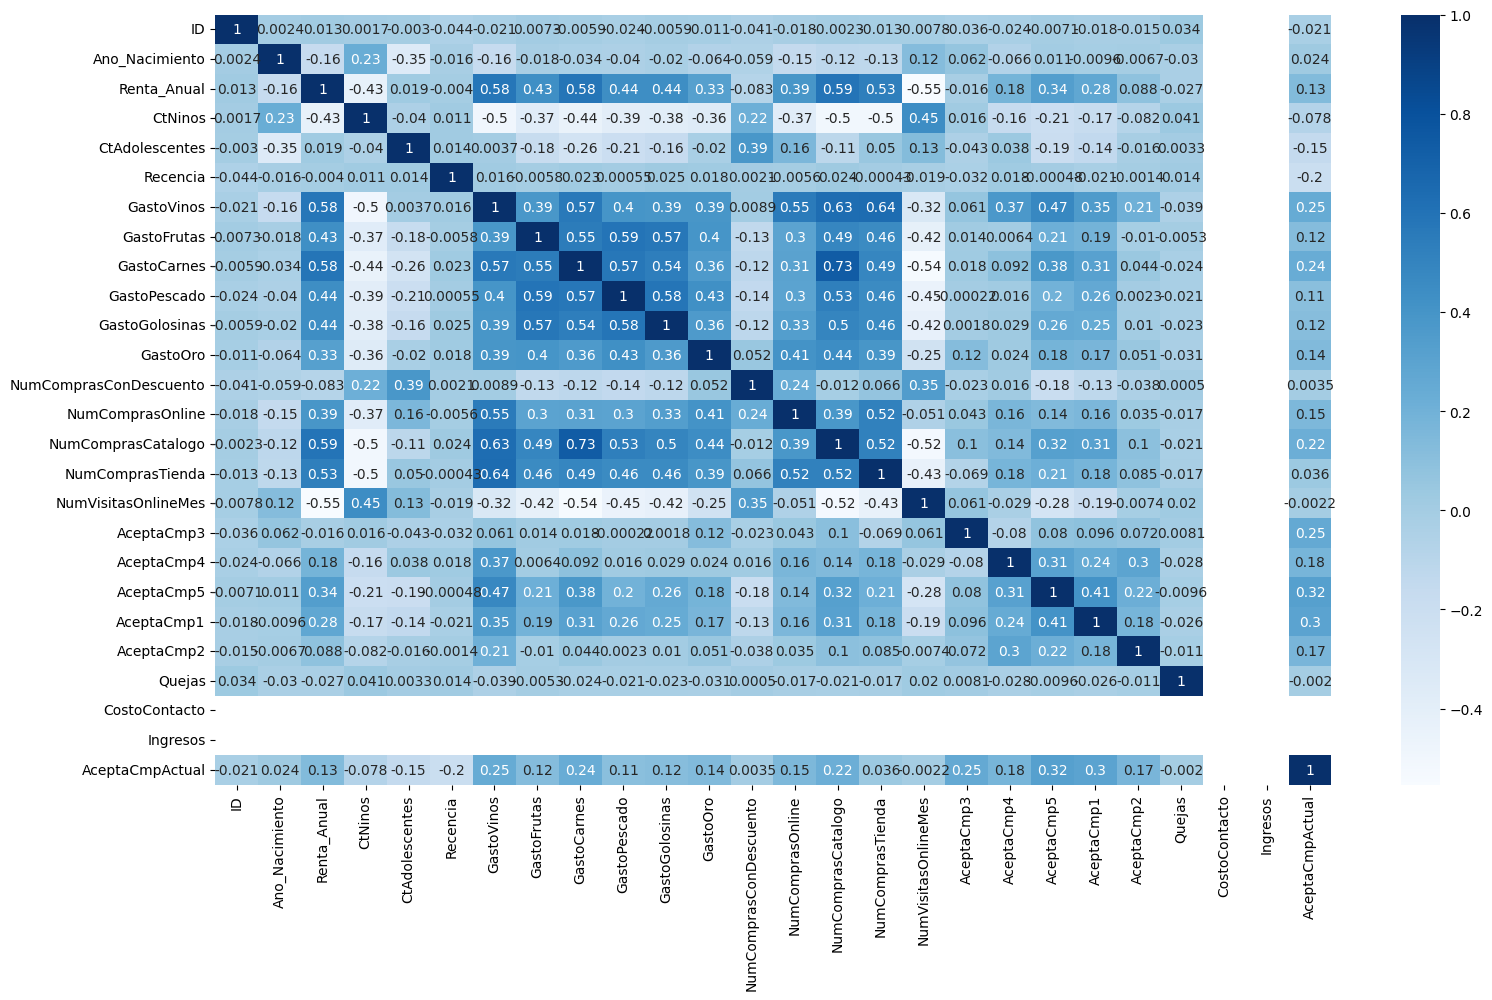

In [ ]:
# 4°) Para visualizar mejor la tabla de arriba vamos a importar la bibiloteca SEABORN y MATPLOTLIB para el momento de graficar
# y luego graficamos nuestro MAPA DE CALOR a traves de un HEATMAP --->

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10)) # Tamaño
grafico_corr = sns.heatmap(matriz_corr, cmap="Blues", annot=True)# Guardamos en una variable el heatmap

# Nos devuelve el mapa de calor, podemos observar un colo mas oscuro cuando la CORRELACION se acerca o es 1 y mas claro cuando la
# CORRELACION se acerca -1 y hay menos correlacion, por ejemplo: la relacion entre GASTOSCARNES(numerica) y NUMEROCOMPRASCATALAGO(variable)
# es alta(0.73), para conciderar eliminar una variable del dataset antes de aplicar MACHINE LEARNING debemos ver la corelacion y cuando el
# valor es muy alto sacarlo.
# A PESAR QUE ESE VALOR ES ALTO NO ES TAN ALTO, UN VALOR ALTO LO PODEMOS CONCIDERAR A PARTIR DE 0.8 YA QUE PRACTICAMENTE SE COMPORTAN IGUAL
# Y ESO PODRIA PERJUDICAR NUESTRO MODELO YA QUE HABRI DE UNA CIERTA FORMA 2 VARIABLES CON CASI LA MISMA INFORMACION Y ESO TRAE DIFICULTADES
# AL MOMENTO QUE NUESTRO ALGORITMO COMIENCE A GENERALIZAR.

In [ ]:
# Podemos observar en el HEATMAP tambien que CostoContacto y Ingresos esta en blanco, tambien podemos analizar ID --->

datos.CostoContacto.value_counts() # Nos devuelve que tiene el numero 3 en las 2216 filas, es decir que ese numero es una
# constante que se repite en todas las filas, NO nos brinda ninguna informacion


3    2216
Name: CostoContacto, dtype: int64

In [ ]:
datos.Ingresos.value_counts() # Nos devuelve numero 11 que se repite en las 2216 filas, es decir que ese numero es una
# constante que se repite en todas las filas, NO nos brinda ninguna informacion

11    2216
Name: Ingresos, dtype: int64

In [ ]:
datos.ID.value_counts() # ID NO nos proporciona ninguna informacion tampoco, pero si nos muestra que cada cliente tiene un ID unico
# que no se repiten clientes en los datos

5524    1
6885    1
3478    1
7494    1
1763    1
       ..
7235    1
3560    1
5278    1
7761    1
9405    1
Name: ID, Length: 2216, dtype: int64

Defenicion:

Hicimos una rápida introducción al análisis exploratorio de los datos, describiéndolos por medio de parámetros estadísticos y utilizando una matriz de correlación.



*   Para visualizar los parámetros estadísticos básicos de los datos, podemos utilizar el método describe() de pandas.DataFrame que contiene nuestros datos.
Podemos utilizar el método describe() para extraer datos estadísticos básicos de nuestro DataFrame.

*   La normalización de datos consiste en padronizarlos dentro de un rango comprendido por dos valores, que pueden ser 0 y 1.La normalización implica en padronizar los datos entre dos valores, que pueden ser 0 y 1.
*  La matriz de correlación presenta la relación que existe entre los atributos de nuestros datos.La matriz de correlación presenta la relación que existe entre los atributos de nuestro DataFrame.






### <font color=red> **SELECCION DE ATRIBUTOS**

In [ ]:
# 1°) Vamos a seleccionar nuestros Atributos a borrar y para esto vamos a craer varaible X, tomaremos nuestro dataset
# y le vamos a hacer un DROP a las columnas que NO vamos a utilizar --->

# "Primera_Compra": Tiene una fecha NO la vamos a utilizar, "Quejas": NO la usaremos en este ejercicio, "Escolaridad": quitamos
# atributo Categorico

X = datos.drop(columns=["ID", "CostoContacto", "Ingresos", "Primera_Compra", "Quejas", "Escolaridad", "Estado_Civil"], axis=1)#AXIS=1 columnas

X.head()
# Nos devuelve el dataset sin esas columnas que NO utilizaremos en este ejercicio, pasamos de 29 columnas a 22.

,Ano_Nacimiento,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,...,NumComprasOnline,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual
0,1957,58138.0,0,0,58,635,88,546,172,88,...,8,10,4,7,0,0,0,0,0,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,1,2,5,0,0,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,8,2,10,4,0,0,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,2,0,4,6,0,0,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,5,3,6,5,0,0,0,0,0,0


In [ ]:
# 2°) Po ejemplo Ano_Nacimiento NO es un Atributo en este caso muy importante, debereiamos agregar la edad de cada cliente que eso
# nos da mas informacion y para esto importamos DATETIME --->

from datetime import datetime

ano_actual = datetime.today().year #Creamos variable, TODAY=para tomar el dia de hoy, YEAR=el año actual

X["Edad"]= ano_actual - datos.Ano_Nacimiento # Creamos Atributo EDAD y al ano_actual le restamos los anos de Ano_Nacimiento
X.head()

# Nos devuelve el dataset con la columna edad agregada.

,Ano_Nacimiento,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,1957,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,0,0,0,0,0,1,67
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,70
2,1965,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,59
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,40
4,1981,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,43


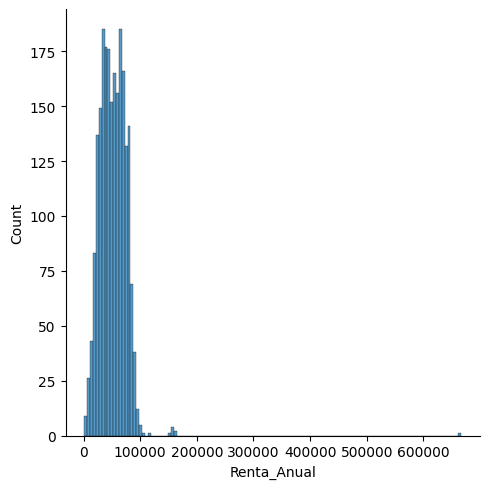

In [ ]:
#  3°) Vamos a observar el atributo RENTA_ANUAL, para esto hacemos un plot, para ver cuanto es que ganan estas personas --->

sns.displot(datos.Renta_Anual)
# nos devuelve la grafica dificil de visualizar, para eso agregamos limite a la X

(0.0, 150000.0)

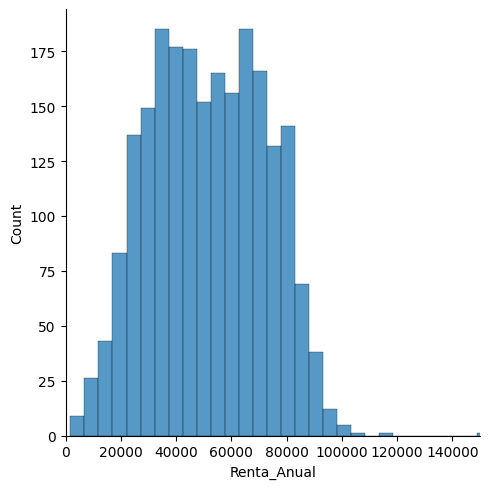

In [ ]:
# 4°) Vamos a visualizar el plot poniendo un limite de valores en X --->

sns.displot(datos.Renta_Anual)
plt.xlim(0,150000)# limite de valores en X

# Nos devuelve un grafico con una DISTRIBUCION NORMAL en forma de campana de gauss, que nos muestra que hay personas que ganan un salario de menos de
# 10000 dolares, un grupo concentrado grande que gana entre los 75000 y los 150000 y por ultimo un grupo reducido de personas que ganan encima de 75000
# dolares, esto es una DISTRIBUCION NORMAL que es lo que se espera al tener datos de un dataset, este Atributo lo dejamos asi, sin moddificacion!

# DE TODAS FORMAS NO NOS DETENDREMOD EN VER CADA UNO DE LOS ATRIBUTOS Y NO MODFIFICAREMOS NINGUNO MAS YA QUE LO QUE QUEREMOS ES USAR NUESTRA CLUSTERIZACION
# PARA VER DE QUE MANERA TRABAJA NUESTRA PC, NO QUEREMOS LOGRAR UNA ESTRATEGIA DE MARKETING CON ESTE EJERCICIO, SOLO APLICAR LOS DIFERENTES ALGORITMOS.

###<font color=red> **NORMALIZACION**

Vamos a NORMALIZAR NUESTROS datos, pero antes vamos a utilizar la funcion DESCRIBE()

In [ ]:
# 1°) Vamos a utilizar la funcion DESCRIBE() para visualizar nuestros datos, que nos devuelve algunos datos estadisticos, por ejemplo la MEDIA(MEAN)
# que nos muestra los Promedios como el caso de la EDAD de los clientes de 55 años promedio, por este motivo creamos la columna Edad, tambien los datos
# estadisticos que nos arroja STD, MIN, etc con respecto a la edad es mejor que con Ano_Naciemiento --->

X.describe()


,Ano_Nacimiento,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.150271,55.179603
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.357417,11.985554
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000


In [ ]:
# 2°) Aplicamos una NORMALIZACION para tener todos los valores de los atributos en el mismo rango de valores entre 0 y 1, pero antes vamos a
# borra la variable Ano_Nacimineto que no utilizaremos --->

X.drop(columns=["Ano_Nacimiento"], axis=1, inplace=True)
X.head()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,58138.0,0,0,58,635,88,546,172,88,88,...,10,4,7,0,0,0,0,0,1,67
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,2,5,0,0,0,0,0,0,70
2,71613.0,0,0,26,426,49,127,111,21,42,...,2,10,4,0,0,0,0,0,0,59
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,4,6,0,0,0,0,0,0,40
4,58293.0,1,0,94,173,43,118,46,27,15,...,3,6,5,0,0,0,0,0,0,43


In [ ]:
# 3°) Ahora NORMALIZAMOS de forma MANUAL y con BIBLIOTECA SKLEARN --->

#********* NORMALIZAMOS DE FORMA MANUAL *********

atributos = X.columns #Creamos variable y traemos las columnas

X_norm = X.copy() ##Creamos la variable X_norm que va a ser igual a una copia de X para que no modifique nuestra X.

for atributo in atributos:
  X_norm[atributo] = (X[atributo]-min(X[atributo]))/(max(X[atributo]-min(X[atributo])))
  #Tomamos el valor MINIMO de Atributo y dividimos ese valor por el valor MAXIMO - el valor MINIMO del atributo, para que nos devuelva valores entre 0 y 1.
X_norm.head()

# Nos devuelve los valores de los atributos ya Normalizados

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,...,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,1.0,0.378641
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,...,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.407767
2,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,...,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.300971
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,...,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.116505
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,...,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.145631


In [ ]:
#********NORMALIZAMOS CON BIBLIOTECA SKLEARN********

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # Instanciamos
X_norm = scaler.fit_transform(X) # Transformamos los valores de X

X_norm = pd.DataFrame(X_norm, columns = X.columns) # Creamos DataFrame con los valores transformados
X_norm.head()

# Nos devuelve los valores NORMALIZADOS con SKLEARN

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,...,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,1.0,0.378641
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,...,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.407767
2,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,...,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.300971
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,...,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.116505
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,...,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.145631


###<font color=orange> **Otros métodos para reescalar los datos**

Existen diversos métodos posibles para reescalar los datos ya implementados en la biblioteca Scikit-learn, como por ejemplo el método **StandardScaler()**.

Este método escala nuestros datos, sustrayendo el promedio de cada uno de los atributos y dividiendo entre el desvío típico, siguiendo la siguiente fórmula :

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_std = standard_scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = X.columns)
X_std.describe()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
count,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,...,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03
mean,5.210433e-17,-1.122247e-16,4.168346e-17,-2.404815e-18,-3.366741e-17,-7.214446e-18,-5.771557e-17,-2.164334e-17,-1.122247e-17,-1.442889e-17,...,-8.016051e-17,7.595208e-17,-5.771557e-17,-1.923852e-17,5.611236e-18,-3.046099e-17,-4.008025e-17,-2.725457e-17,2.885778e-17,8.196412e-17
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,...,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00
min,-2.007250e+00,-8.230393e-01,-9.289722e-01,-1.693488e+00,-9.046404e-01,-6.624630e-01,-7.447440e-01,-6.875744e-01,-6.582331e-01,-8.486891e-01,...,-9.128373e-01,-1.784893e+00,-2.193591e+00,-2.817730e-01,-2.827048e-01,-2.808389e-01,-2.616615e-01,-1.171482e-01,-4.205300e-01,-2.268209e+00
25%,-6.732620e-01,-8.230393e-01,-9.289722e-01,-8.642385e-01,-8.334770e-01,-6.121927e-01,-6.733896e-01,-6.327696e-01,-6.338802e-01,-6.749564e-01,...,-9.128373e-01,-8.618303e-01,-9.563810e-01,-2.817730e-01,-2.827048e-01,-2.808389e-01,-2.616615e-01,-1.171482e-01,-4.205300e-01,-6.826092e-01
50%,-3.439972e-02,-8.230393e-01,-9.289722e-01,-4.365786e-04,-3.872229e-01,-4.613818e-01,-4.414876e-01,-4.683552e-01,-4.634095e-01,-3.757501e-01,...,-2.293274e-01,-2.464554e-01,2.808287e-01,-2.817730e-01,-2.827048e-01,-2.808389e-01,-2.616615e-01,-1.171482e-01,-4.205300e-01,-9.844093e-02
75%,6.466600e-01,1.039938e+00,9.090657e-01,8.633654e-01,5.927571e-01,1.669967e-01,2.910105e-01,2.258390e-01,1.454144e-01,2.323143e-01,...,4.541825e-01,6.766069e-01,6.932320e-01,-2.817730e-01,-2.827048e-01,-2.808389e-01,-2.616615e-01,-1.171482e-01,-4.205300e-01,8.195377e-01
max,2.441328e+01,2.902916e+00,2.747104e+00,1.727167e+00,3.522319e+00,4.339430e+00,6.948158e+00,4.043907e+00,5.722241e+00,5.347777e+00,...,8.656301e+00,2.215044e+00,6.054474e+00,3.548956e+00,3.537258e+00,3.560760e+00,3.821732e+00,8.536197e+00,2.377952e+00,6.327410e+00


- ## **ALGORITMO KMEANS**



---










###<font color=red> **KMEANS**

*  Nosotros mismos le decimos al algoritmo cuántos clusters o cuántas agrupaciones nosotros queremos y lo que hace este algoritmo es minimizar la distancia promedio entre los puntos geométricos de dichas muestras.
Él mide la distancia a cada uno de los puntos de forma iterativa asignándolos a un centro o un centroide cercano a esta muestra.

*   **Ejemplo** : Vamos a observar aquí en el mapa que tenemos una serie de restaurantes en Ciudad de México, esto es el centro de Ciudad de México. Entonces tenemos todos estos gráficos aquí, todos estos puntitos aquí donde aparece el tenedor y el cuchillo son los restaurantes. Entonces hay varios restaurantes. Inicialmente, por ejemplo, yo podría decir, aquí hay tres grupos, por ejemplo, yo puedo decir que digamos al ver estos puntitos aquí hay tres grupos de restaurantes, entonces aquí hay un grupo, hay otro grupo, aquí hay otro grupo.
Entonces, a mí, visualmente, a mis ojos le queda fácil decir aquí hay tres grupos de restaurante, entonces este grupo va a ser de este color, este grupo va a ser de este color y este grupo va a ser este color y listo. Yo humano lo hago de esa forma, el computador no lo puede hacer así, el computador funciona de manera diferente. ¿Entonces el computador qué hace?
Él observa los puntos tal cual, nosotros los observamos de esa forma, pero él lo que hace es de manera aleatoria enviar tres centroides de acuerdo al número de clusters. Si yo por ejemplo dije que el número de clusters es tres, entonces cada una de estas estrellitas en un centroide y él las arroja en cualquier lugar de este mapa.
Aquí por ejemplo, para nuestro ejemplo, las arrojé. Aquí en estos puntos, pero ya podrían haber quedado más en este lado, en este lado o totalmente repartidas. No interesa, lo que interesa es que él arroja esos centroides y él comienza a medir la distancia de esos centroides a los puntos, a los puntos que estén más en el lugar y comienza entonces a digamos decir “estos puntos me pertenecen a mí”.
Entonces asigna cada uno de estos restaurantes o cada uno de estos puntos al centroide más cercano. Entonces aquí él ya me dio la distancia y después de medir esta distancia, entonces él nuevamente recalcula la posición del centroide y toma el promedio. Entonces él se desplaza, entonces noten ustedes, esta flecha indica que ya al calcular estas distancias, él dijo no, la mejor posición para este centroide ya no es más esta, sino que es más para este lugar y nuevamente recalcular las distancias.
Lo mismo hace la posición de este centroide, no es más para este lugar, sino se viene, desplaza un poco. Lo mismo aquí en el centroide rojo. Entonces, él se desplaza. Y noten ustedes que ya, por ejemplo al centroide este azul acercarse más hacia estos puntos, se alejó de este punto que inicialmente lo había considerado como de su grupo y lo dejó aquí suelto.
Y ya este punto se acerca más al centroide de este azul claro, entonces el azul oscuro, como se alejó, ya este punto que era azul oscuro, se vuelve azul claro, vean ustedes. ¿Por qué? Porque ya está más cerca de este nuevo centroide. Y él nuevamente recalcula las distancias, entonces actualiza la posición del centroide y repite los pasos del 1 al 3.
Establece nuevamente los centroides, asigna los puntos al centroide más cercano y actualiza la posición del centroide. Esto se repite varias veces, hasta que finalmente mis centroides quedan en el lugar, en un lugar en el cual pues ya están localizados como en una posición de equilibrio, al interior de cada grupo de clusters y de esta manera mi KMeans me arroja este resultado.

*   **Ventajas del KMeans** : Entonces es de fácil implementación, es un algoritmo muy sencillo, porque él simplemente calcula las distancias. Puede escalarse a grandes datasets, tiene la garantía de que va a converger, o sea, va a tener convergencia, yo establezco el número de clusters que deseo, lógicamente si estoy agrupando pues lo mínimo que deseo son dos grupos, dos clusters.
Y de ahí en adelante la cantidad de clusters que yo quiera, entonces va a converger. Va a adaptarse fácilmente a nuevas muestras de nuestros datos y generaliza bien con clusters de simetría radial, o sea, que tienen como una forma circular o en forma de óvalo.
*   **Desventajas de KMeans** : Lógicamente, que nosotros tenemos que escoger el número K de forma manual.
O sea, es un número, es un parámetro que nosotros mismos debemos colocar. Hay lógicamente herramientas que nos ayudan a establecer el mejor número de clusters para nuestro algoritmo, pero eso no lo veremos propiamente en este entrenamiento. Hay otros entrenamientos en nuestra plataforma que hablan de algunas técnicas, por ejemplo, la técnica del codo.
Yo puedo a través de esa técnica, pues establecer el mejor número de K. Existen otras varias técnicas, como les dije, no las vamos a trabajar aquí en este curso. Otra de las desventajas es que no se puede clusterizar bien los datos de tamaños y densidades variables. Entonces se presenta ese problema.
Es sensible a outliers. Lógicamente un outlier lo que va a hacer al calcular la distancia promedio, entonces lo que va a hacer es, va a arrastrar el nuestro centroide se lo va a llevar más cerca al outlier, entonces se perjudica. No es indicado cuando hay muchas dimensiones en nuestro problema, porque las métricas de distancia comienzan a perder sentido. Entonces no se indica en estos casos.

###<font color=red> **AGRUPANDO CON KMEANS**

Implementamos Kmeans.

In [ ]:
# 1°) Importamos la biblioteca SKLEARN con CLUSTER y KMEANS --->

from sklearn.cluster import KMeans

In [ ]:
# 2°) Ahora Instanciamos un Agrupador, Clusterizar quiere decir agrupar --->

agrupador = KMeans(n_clusters=3)#Creamos variable y para nuestro Kmeans establecemos 3 clusters

In [ ]:
# 3°) Luego hacemos un FIT al agrupador y pasamos nuestro valores NORMALIZADOS --->

agrupador.fit(X_norm)

# Todo esto nos devuelve KMEANS con el nuemro de CLUSTERS igual a 3.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
# 4°) Ahora veamos de que manera agrupo o realializo la Clusterizacion mi Algoritmo --->

agrupador.labels_

# Tomo mi agrupador y llamo un atributo que son los LABELS que nos devuelve un ARRAY con todo el dataset con los LABELS que les asigno a
# cada uno de los CLUSTERS

array([0, 1, 2, ..., 2, 2, 0], dtype=int32)

In [ ]:
# 5°) Creamos una nueva variable de nuestros datos --->

datos["Cluster_Kmeans"] = agrupador.labels_ # colocamos nuestros labels a la variable.
datos.Cluster_Kmeans.value_counts() # Hacemos un value_counts para que nos muestre los valores

# Nos devuelve los 3 Cluster y la cantidad de registros o muestra que agrupo en cada Cluster, por ejemplo en el Cluster que le puso el
# LABEL 2 tiene 1086 registros.

1    1085
2     798
0     333
Name: Cluster_Kmeans, dtype: int64

In [ ]:
# 6°) Ahora colocamos 4 CLUSTER y utilizamos lo mismo codigos --->

agrupador = KMeans(n_clusters=4)
agrupador.fit(X_norm)
datos["Cluster_Kmeans"] = agrupador.labels_
datos.Cluster_Kmeans.value_counts()

# El Cluster 0 tiene 1037 registros

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    1037
2     774
3     237
0     168
Name: Cluster_Kmeans, dtype: int64

Definicion:

Hicimos una introducción al método KMeans, aprendiendo sobre sus parámetros configurables y haciendo aplicaciones en nuestros datos. Adicionalmente, generamos también gráficos interactivos para la visualización de clusters tanto en dos dimensiones como en tres dimensiones.



*   Es siempre una buena práctica comenzar con una cantidad pequeña de clusters, evaluando según el conocimiento de negocios si el agrupamiento tiene sentido. Comenzando con una cantidad pequeña de clusters es posible evaluar mejor los resultados de cada uno, permitiendo inferir si existe o no la necesidad de aumentar el número de grupos.
*   Cuanto mayor sea el número de grupos k, más detalles podrán ser percibidos en los clusters. Cuanto mayor sea el número de grupos k, más detalles podrán ser absorbidos por las agrupaciones.
*   Cuanto mayor sea el número de grupos k, más detalles podrán ser absorbidos por las agrupaciones. El método KMeans se basa en la realización de promedios para la definición de los centros de los k grupos.






###<font color=red> **GRAFICANDO CLUSTERS EN 2D**

In [ ]:
# 1°) Vamos a graficar nuestro CLUSTER 2D, primero Instanciamos el Agrupador, tambien importamos la biblioteca que nos permite hacer
# este tipo de grafico --->

import warnings # Para que NO nos aparezcan los warnings
import plotly.graph_objects as go # Nos permite pasar el puntero del mouse e interactuar con el grafico

warnings.filterwarnings("ignore")

#Instanciamos
agrupador = KMeans(n_clusters=3)
agrupador.fit(X_norm)
labels = agrupador.labels_

#Graficamos
figura = go.Figure()
figura.add_trace(go.Scatter(x=datos['Renta_Anual'],
                            y=datos['GastoVinos'],
                            mode='markers', marker=dict(color=labels.astype(np.float64)),
                            text=labels))
figura.show()

# Nos devuelve el grafico con los 3 CLUSTER que nos permite interactuar con el a traves del cursor del mouse(100k=100000dol)
# Tenemos 3 Clusters, el cluster 0,1,2, tambien tenemos otras funcionalidades en la parte superior del grafico.


In [ ]:
# 2°) Podemos graficar tambien con 4 CLUSTERS, tomamos los mismos codigos y cambiamos(n_clusters=4) ---->

#Instanciamos
agrupador = KMeans(n_clusters=4)
agrupador.fit(X_norm)
labels = agrupador.labels_

#Graficamos
figura = go.Figure()
figura.add_trace(go.Scatter(x=datos['Renta_Anual'],
                            y=datos['GastoVinos'],
                            mode='markers', marker=dict(color=labels.astype(np.float64)),
                            text=labels))
figura.show()

###<font color=red> **GRAFICANDO CLUSTERS EN 3D**

In [ ]:
# 1°) Tomamos los codigos anteriores y en SCATTER3d agregamos 3d, pasamos un parametro mas Z y tomamos la EDAD que creamos en X
# normalizados --->

#Instanciamos
agrupador = KMeans(n_clusters=4)
agrupador.fit(X_norm)
labels = agrupador.labels_

#Graficamos
figura = go.Figure()
figura.add_trace(go.Scatter3d(x=datos['Renta_Anual'],
                            y=datos['GastoVinos'],
                            z=X["Edad"], #Creamos Z, con los valores de la Edad, creado en X normalizados.
                            mode='markers', marker=dict(color=labels.astype(np.float64)),
                            text=labels))
figura.show()

# Nos devuelve el grafico en 3d pero NO es tan sencillo visualizar, podemos entonces para ello adicionar los nombres de los ejes y establecer unos
# limites de los valores por ejemplo del salario para que quede mas facil visualizar los datos.

In [ ]:
# 2°) Agregamos los nombres a los ejes y establcemos limite en x --->

#Instanciamos
agrupador = KMeans(n_clusters=4)
agrupador.fit(X_norm)
labels = agrupador.labels_

#Graficamos
figura = go.Figure()
figura.add_trace(go.Scatter3d(x=datos['Renta_Anual'].loc[datos['Renta_Anual']<=110000], #Colocamos limite $ a Renta_Anual
                            y=datos['GastoVinos'],
                            z=X["Edad"], #Creamos Z, con los valores de la Edad, creado en X normalizados.
                            mode='markers', marker=dict(color=labels.astype(np.float64)),
                            text=labels))
figura.update_layout(scene=dict(xaxis_title="Renta_Anual", yaxis_title="GastoVinos", zaxis_title="Edad del Cliente"))# Creamos nombres de EJES.

figura.show()


**Podemos ver al momento de ejecutar el codigo, luego pueden variar los colores:**

El cluster morado que es este que está aquí en todas las regiones de salario, pero que se caracteriza porque consumen, digamos, entre 0 y tal vez 200 o 250 dólares en vinos.
Y la edad, pues están de todas las edades en ese cluster. Lo mismo aquí, en el cluster azul que consume, por ejemplo, entre 200 y 800 dólares en vinos, también en todos los rangos de salarios y en todas las edades. Y finalmente, un cluster por ejemplo, el naranja verdad que consume tal vez entre 600 dólares y 1400 dólares en vinos y de la misma forma está en todos los rangos de edad.
Y el clúster amarillo, como se observaba en el gráfico anterior, él no está bien definido, él está por todos nuestros datos, es como una especie de ruido realmente este cluster. Entonces, el cluster amarillo que vendría siendo el cluster 2 podría observarse como ruido, no está bien definido los otros, a pesar de que tengan varios puntos que son cuestionables o que no se entiende bien porque están por ejemplo, como están mezclados sí puede tratar de decirse hay una especie de definición entre ellos.
Digamos hay una mayor densidad de los puntos del cluster 2 en esta región, hay una mayor densidad de los puntos del cluster 0 en esta región y hay una mayor densidad de los puntos del cluster 1 en esta región y el cluster amarillo, que es el 3, está por todos los datos. Entonces está digamos ahí de una cierta forma, pues dificultando nuestros grupos.


###<font color=red> **VISUALIZANDO LOS CENTRIODES**

In [ ]:
# 1°) Para esto creamos un avariable y en ella instanciamos un dataframe de pandas que va a recibir datos de agrupados
# y el atributo cluster_centers_ --->

centriodes = pd.DataFrame(agrupador.cluster_centers_, columns = X.columns) # Traemos tambien las columnas
centriodes.head()

# Nos devuelve 4 fila(porque son 4 centriodes) y 22 columnas, tenemos para cada uno de los ATRIBUTOS un valor, el considera un
# punto en este espacio vectorial donde se encuentran nuestros datos, en el espacio de nuestros datos. Pero necesitamos graficar
# esos puntos para visualizar mejor.

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.119385,0.024306,0.072917,0.455527,0.589199,0.278127,0.268981,0.311535,0.234786,0.242233,...,0.217262,0.620192,0.162847,0.173611,0.486111,8.541667e-01,0.611111,0.138889,7.638889e-01,0.249326
1,0.054441,0.385565,0.256885,0.512226,0.044043,0.027998,0.020067,0.030914,0.021955,0.057631,...,0.026218,0.267660,0.319136,0.047483,0.010446,1.249001e-16,0.002849,0.001899,-3.330669e-16,0.243935
2,0.072628,0.246637,0.199552,0.327264,0.220455,0.144039,0.117229,0.144398,0.106014,0.158865,...,0.113709,0.398758,0.313677,0.255605,0.058296,-5.551115e-17,0.035874,0.013453,1.000000e+00,0.263311
3,0.097541,0.031407,0.294598,0.526560,0.342276,0.241004,0.161462,0.266851,0.185982,0.216730,...,0.159727,0.664283,0.200879,0.038945,0.087940,4.899497e-02,0.054020,0.006281,-3.330669e-16,0.293055


In [ ]:
# 2°) Graficamos los puntos(centriodes), tenemos que tomar los valores y colocarlos en la escala original, para esto existe una funcion
# que INVIERTE la Normalizacion de los datos --->

inverso = scaler.inverse_transform(centriodes)
#Creamos DATAFRAME:
centros = pd.DataFrame(inverso, columns = X.columns)
centros.head()

# Nos devuelve los CENTRIODES con los valores originales, valores NO NORMALIZADOS.

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,81113.152778,0.048611,0.145833,45.097222,879.673611,55.347222,463.993056,80.687500,61.513889,77.756944,...,6.083333,8.062500,3.256944,0.173611,0.486111,8.541667e-01,0.611111,0.138889,7.638889e-01,53.680556
1,37929.837607,0.771130,0.513770,50.710351,65.756885,5.571700,34.615385,8.006648,5.752137,18.499525,...,0.734093,3.479582,6.382716,0.047483,0.010446,1.249001e-16,0.002849,0.001899,-3.330669e-16,53.125356
2,50022.798206,0.493274,0.399103,32.399103,329.139013,28.663677,202.219731,37.399103,27.775785,50.995516,...,3.183857,5.183857,6.273543,0.255605,0.058296,-5.551115e-17,0.035874,0.013453,1.000000e+00,55.121076
3,66588.457286,0.062814,0.589196,52.129397,511.017588,47.959799,278.521357,69.114322,48.727387,69.570352,...,4.472362,8.635678,4.017588,0.038945,0.087940,4.899497e-02,0.054020,0.006281,-3.330669e-16,58.184673


In [ ]:
# 3°) Graficamos los CENTRIODES --->


figura = go.Figure()
figura.add_trace(go.Scatter3d(x=datos['Renta_Anual'].loc[datos['Renta_Anual']<=110000], #Colocamos limite $ a Renta_Anual
                            y=datos['GastoVinos'],
                            z=X["Edad"], #Creamos Z, con los valores de la Edad, creado en X normalizados.
                            mode='markers', marker=dict(color=labels.astype(np.float64)),
                            text=labels))
figura.update_layout(scene=dict(xaxis_title="Renta_Anual", yaxis_title="GastoVinos", zaxis_title="Edad del Cliente"))
# Graficamos Centriodes:
figura.add_trace(go.Scatter3d(x=centros['Renta_Anual'],
                              y=centros['GastoVinos'],
                              z=centros['Edad'],
                              mode='markers',
                              marker=dict(color='red'),
                              text= [0,1,2,3]))# Pasamos en modo de lista la cantidad de Clusters
figura.show()



**Podemos ver los CENTRIODES y los datos, cada vez que ejecutemos KMeans los agrupa diferente, puede variar color:**

Aquí aparecen nuestros centroides, pero yo también quiero ver mis datos. Lógicamente, entonces yo como instancié la figura de nuevo, entonces lógicamente borré lo anterior, ¿pero qué hacemos?
Simplemente volvemos y ejecutamos aquí nuestra gráfica. Ya está nuevamente nuestra gráfica en 3D, vamos a colocar nuestros ejes, el nombre de nuestros ejes. Lógicamente actualizar aquí nuestros centroides, porque al ejecutar yo de nuevo KMeans, pues obviamente los labels cambiaron.
Él cambia los labels siempre que se ejecuta, con cada ejecución él cambia los labels. Entonces yo tengo que nuevamente ejecutar mis centroides, ejecutar esta función de invertir entonces los valores para hacer este show. Entonces, ahora sí, si yo vuelvo a mi gráfica, entonces yo puedo comenzar a buscar los cendroides, entonces, por ejemplo este primer centroide pertenece al cluster 3 y el cluster 3 son los puntos amarillos.
Entonces, bueno, es el centroide del cluster 3, y si yo observo bien, pues tiene sentido porque la concentración de los puntos amarillos se encuentra es más como en esta región de los que más gastan en vinos. Ahora veamos este segundo centroide, aquí el cluster 1, que vendría siendo los morados, que son los que se encuentran como hacia la mitad.
Este centroide debe pertenecer al clúster 2, que es los puntos naranjas que también se encuentra más o menos como en esa región, es como un ruido, y finalmente tenemos este otro cluster center que es el cero que es el cluster azul. Entonces aquí yo puedo de una cierta forma ver cómo KMeans fue dejando mis centroides para poder entonces establecer el centro de cada uno de estos clusters.

- ## **ALGORITMO DBSCAN**



---

###<font color=red> **DBSCAN**



*  DBSCAN quiere decir que es una clusterización espacial basada en densidad para aplicaciones con ruido. Eso es lo que quiere decir: Density Based Spatial Clustering of Applications with Noise, algoritmo de agrupamiento espacial basado en densidad para aplicaciones con ruido.
Cuando hablamos de ruido estamos hablando de outliers. Y cuando hay regiones con muchas observaciones, o sea con una alta densidad, entonces esta región se consideraría un cluster.



*  Entonces el problema que tenemos dado un conjunto de puntos C, este conjunto lo vamos a llamar C, deseamos agrupar los n puntos de este conjunto en grupos de una densidad específica, que tienen esa densidad.
Tenemos otro grupo de restaurantes también en el Centro de Ciudad de México. Entonces tenemos todos estos restaurantes. Entonces, si yo los observo cada uno de estos puntos y quiero tratar de agruparlos, entonces, considerando dos clusters, van a haber regiones como estas en las cuales va a ser difícil de determinar a qué cluster pertenecen a estos puntos, digamos.
Pues yo tengo este cluster rojo o cluster azul, pero aquí en esta área pues no queda bien definido a qué punto o a qué cluster pertenece cada punto, cada uno de estos restaurantes. Entonces aquí es cuando comenzamos a ver la necesidad de utilizar alguna otra forma de agrupación, de crear nuestros grupos, entonces no están bien definidos los clusters.
DBSCAN lo que va a hacer es definir una distancia mínima para considerar vecinos a los puntos y esta distancia se conoce como Epsilon. Entonces vamos a tomar como referencia a este punto. Entonces, ese Epsilon lo podemos observar como si fuera un radio de distancia alrededor de ese punto, entonces definimos esa distancia mínima.
También vamos a establecer un número de mínimo de puntos para que sea considerado un clúster, o sea, el mínimo número de muestras va a considerarse un clúster, entonces para nuestro ejemplo, aquí vamos a decir que el mínimo número de muestras es el 3. Entonces vamos a comenzar y este Epsilon es 1. Pensemos en 1 como el radio.
Entonces él comenzó a realizar una búsqueda alrededor de cualquier punto y entonces encontró este. Entonces dijo, bueno, esto, ya tenemos dos puntitos aquí, ya tenemos tres, se volvieron un cluster. Entonces él comienza el continúa haciendo esta búsqueda y noten ustedes que él ya encontró este otro puntito, lo tocó, entonces ya hace parte de este clúster y al seguir haciendo su búsqueda, encontró estos otros dos y así él continúa haciéndolo, de forma recurrente.
Él se va acercando a nuevos puntos, va encontrando nuevos puntos, y llega una parte donde llegó a un punto y no tiene más nada cerca. Entonces, él comienza en otro punto y él mide las distancias. Él observa alrededor y si no encuentra más puntos, salta hacia otro lugar. Entonces lo mismo.
Entonces, este otro lugar ya sería considerado un nuevo cluster porque ya no tiene solo un punto, sino que tiene ya estos otros dos que serían tres. Entonces, de esta manera, yo voy a tener dos clusters y un puntito fuera del valor de eps o el valor Epsilon, y este punto por fuera se considera ruido, no pertenece a ninguno de los clusters, es simplemente un outlier.

*   **Entonces el objetivo de DBSCAN** es hacer que cada clúster tenga un número mínimo de puntos. O sea, nosotros establecemos un número mínimo de puntos. Yo quiero, por ejemplo, que mis clusters tengan como mínimo 100 puntos o, como mínimo 200 o como mínimo 500, si no, no los considero cluster, y establecido un valor de eps, que es el Epsilon, que es el radio que a mí me permite decir si va a ser vecino o no este punto.
Entonces, eso es a grandes rasgos lo que hace DNSCAN. **¿Entonces por qué utilizamos DBSCAN?** Generalmente KMeans no presenta un buen resultado cuando hay ruido, cuando hay outliers. ¿Qué sucede? Digamos los outliers, lo que hacen es arrastrar a mi centroide hacia aquel lugar porque la distancia recuerden que él va calculando los promedios y si yo tengo varios ouliers, mi centroide se va a alejar de donde se encuentran los puntos más concentrados, por decirlo así, de alguna forma.
Y también cuando, por ejemplo, estos clusters no tienen una simetría radial, o sea, no son en forma de óvalo o en forma circular, entonces KMeans no tiene un buen resultado en estos casos.

*   **¿Cuáles son las ventajas de DBSCAN?** Bueno robusto a outliers, ya lo dijimos, porque nosotros establecemos una distancia mínima para considerarlo parte de un cluster.
Puede detectar cualquier tipo de forma. Aquí sí lo genial de este algoritmo es que nos permite a nosotros detectar cualquier posibilidad de formación de nuestro conjunto de datos. El costo computacional es moderado, es un poco más costoso que KMans, lógicamente. Y también es el segundo algoritmo de clusterización más empleado.
* **Las desventajas de DBSCAN**. Lógicamente, como tiene sus ventajas, también tiene sus desventajas. No se indica cuando hay muchas dimensiones, porque las métricas de distancia comienzan a perder sentido. Claro, digamos yo entro en una, dos, tres, cuatro dimensiones, entonces, en la medida que vamos adentrándonos, las distancias, pues lógicamente también, pues se empieza como a perder.
Entonces, no es recomendable. Tampoco logra identificar clusters de varias densidades, porque hay clusters donde hay más concentración, hay clusters que están un poquito más separado, pero mismo aun así, pues se considera un cluster porque allí hay una densidad que cambia, no hay tanta concentración, es menos denso, pero también es cluster.
Entonces ahí hay un problema. ¿Por qué? Porque el parámetro eps y el parámetro min_samples son parámetros fijos que nosotros especificamos al momento de instanciar este tipo de agrupador, entonces nosotros no podemos ya quedar modificando nuestro eps. No. El eps, el radio que nosotros establecimos o la condición que nosotros establecimos para especificar si un punto va a ser vecino o no ya quedó definido el principio y lo mismo con el min_samples, con Yo dije no, el mínimo número de muestras que yo quiero son 50. Entonces, si no encuentra 50, si encontró 49, entonces ya no me lo considera cluster y ya se complica un poco. Y, lógicamente, parametrizar eps y el mínimo número de muestras generalmente no es una tarea fácil.



###<font color=red> **AGRUPANDO CON DBSCAN**
Vamos a instanciar nueestro AGRUPADOR con DBSCAN.

In [ ]:
# 1°) Importamos DBSCAN de SKLEARN --->

from sklearn.cluster import DBSCAN

In [ ]:
# 2°) Creamos la variable y luego la instanciamos --->

agrupador = DBSCAN(eps= 0.1, min_samples=200, metric="euclidean")# EPS=distancia de un punto a sus vecinos para considerarlos dentro del Cluster
#200=puntos(muestras), euclidean=distancia euclidiana
agrupador.fit(X_norm) # fit a los datos Normalizados
datos["Cluster_DBSCAN"] = agrupador.labels_# Creamos columna, labels_=para saber que nuemro quedo asignado a cada Clusters
datos.Cluster_DBSCAN.value_counts() # para ver como quedo nuestra Clusterizacion.

# DBSCAN es una agrupación que ella se encarga de analizar la densidad. Es basada en densidad para las aplicaciones con ruido.
# Entonces es agrupación espacial o agrupamiento espacial basado en densidad para aplicaciones con ruido, el ruido refiérase a los outliers.
# O sea, puntos que digamos él no logra identificar como parte de un cluster, entonces lógicamente, si yo coloco un eps pequeño, muy pequeño,
# entonces piensa tú en un punto, en una muestra en el espacio, un espacio multidimensional y si yo le pongo bien cerca todo, pues lógicamente no va a tener nada cerca.
# Entonces no va a poder reunir la cantidad de puntos suficientes, que serían 200 para considerarlos un cluster.
# Puede ser que tenga 199 puntos ahí, pero no llegó a los 200. Entonces no va a ser cluster. Este -1 siempre va a ser referencia al ruido,
# él detectó todos los puntos de nuestro dataset como ruido.

-1    2216
Name: Cluster_DBSCAN, dtype: int64

In [ ]:
# 3°) Entonces vamos da darle una distancia minima mas grande para ver como se comporta nuestro Algoritmo(2.1), manteniendo
# el mismo numero de muestras ( min_samples=200) --->

agrupador = DBSCAN(eps= 2.1, min_samples=200, metric="euclidean")
agrupador.fit(X_norm)
datos["Cluster_DBSCAN"] = agrupador.labels_
datos.Cluster_DBSCAN.value_counts()

# Y ahora sucedió todo lo contrario. Él dijo que las 2216 muestras pertenecen a un mismo cluster, entonces se trataría de un solo cluster.
# Entonces eso tampoco es útil para mí, porque ¿de qué me sirve yo colocarle a un punto un radio muy grande? Él va a detectar todos los puntos
# y él va a decir: “no, todos son vecinos”. Entonces, claro, él me creó un solo clúster.

0    2216
Name: Cluster_DBSCAN, dtype: int64

In [ ]:
# 4°) Ahora vemos que sucede con esp=1.1 --->

agrupador = DBSCAN(eps= 1.1, min_samples=200, metric="euclidean")
agrupador.fit(X_norm)
datos["Cluster_DBSCAN"] = agrupador.labels_
datos.Cluster_DBSCAN.value_counts()

# Y ahora él dice que hay un clúster, que contiene 1961 muestras y existen 255 puntos o 255 muestras en las cuáles solo hay ruido.
# Entonces él digamos, se acercó, digamos, redujo su radio de acción, pero aún así quedó solamente un clúster, y el resto ruido,
# entonces digamos en estos casos a mí únicamente un clúster así y de resto ruido no me puede parecer muy interesante y volvemos al punto
# que nosotros les mencionamos durante la explicación del algoritmo DBSCAN, que ajustar el parámetro eps y el min_samples son tareas que no siempre son muy fáciles.
# O sea, es complicado llegar a un a un valor de eps y a un valor ideal de min_samples, es complicado, pero vamos a estar aquí ajustando estos hiperparámetros
# y vamos a tratar de visualizar entonces nuestros clusters empleando DBSCAN


 0    1961
-1     255
Name: Cluster_DBSCAN, dtype: int64

**Definicion:**



*   El método DBSCAN posee inmunidad al ruido, esto es, puede ser aplicado en datos que poseen ruido. El método DBSCAN, como el propio nombre lo indica, posee inmunidad al ruido.

*   El parámetro min_samples define el número de puntos vecinos necesarios para que un agrupamiento sea considerado un grupo o cluster. De hecho, el parámetro min_samples define el número mínimo de puntos para que un agrupamiento sea considerado un grupo o cluster válido.

*   El criterio de distancia es utilizado en DBSCAN para definir la forma de cálculo de la distancia entre los puntos. El criterio de distancia define la ecuación que será utilizada para calcular la distancia entre dos puntos.





###<font color=red> **AJUSTE DE HIPERPARAMETROS Y VISUALIZACION**

Vamos esta vez ajustar los hiperparámetros y a tratar de visualizar nuestros clusters. Entonces, lo que haremos es ajustar de forma gradual el valor de epsilon, vamos a mantener el mínimo número de muestras y vamos a crear entonces una **LISTA** en la cual almacenaremos diversos valores de epsilon para ver cómo se comporta nuestro algoritmo.

In [ ]:
# 1°)Creamos una LISTA --->

import numpy as np

rango = [i for i in np.arange(0.1,1.5,0.05)]# Valor inicial 0.1 y valor final 1.5 de Epsilon, 0.05=como quiero que avance.
rango

# Nos devuelve valores de EPSILON que vamos a utilizar.

[0.1,
 0.15000000000000002,
 0.20000000000000004,
 0.25000000000000006,
 0.30000000000000004,
 0.3500000000000001,
 0.40000000000000013,
 0.45000000000000007,
 0.5000000000000001,
 0.5500000000000002,
 0.6000000000000002,
 0.6500000000000001,
 0.7000000000000002,
 0.7500000000000002,
 0.8000000000000002,
 0.8500000000000002,
 0.9000000000000002,
 0.9500000000000003,
 1.0000000000000004,
 1.0500000000000003,
 1.1000000000000005,
 1.1500000000000004,
 1.2000000000000004,
 1.2500000000000004,
 1.3000000000000005,
 1.3500000000000005,
 1.4000000000000006,
 1.4500000000000006]

In [ ]:
# 2°) Tomamos las lineas de codigo que creamos anteriormente y creamos un CLICLO DE LAZO --->

for e in rango:
  agrupador = DBSCAN(eps=e, min_samples=200, metric="euclidean")
  agrupador.fit(X_norm)
  datos["Cluster_DBSCAN"] = agrupador.labels_
  print(f"El EPSILON es: {e}, y hay {len(datos.Cluster_DBSCAN.value_counts())} Clusters.")# Nos va a dar la longitud de lo que habría dentro de los value_counts.
#Entonces nosotros queremos medir la cantidad de clusters que hay.

# Con el epsilon 0.1 hay un cluster, con el 0.15 hay un cluster, aquí con el 0.35 hay dos clusters, con el 0.45 hay tres clusters, con el 0.50, hay 3 clusters y
# de ahí en adelante nuevamente hay dos clusters.Y si yo continúo avanzando, recuerda que aquí estamos llegando en el rango hasta 1.5.
# En nuestro video anterior vimos que con el 2.1 ya quedaba únicamente un cluster. Entonces no tenemos que ir más allá, sabemos que automáticamente
# cuando el epsilon está entre 0.45 y 0.50, vamos a encontrar tres clusters.



El EPSILON es: 0.1, y hay 1 Clusters.
El EPSILON es: 0.15000000000000002, y hay 1 Clusters.
El EPSILON es: 0.20000000000000004, y hay 1 Clusters.
El EPSILON es: 0.25000000000000006, y hay 1 Clusters.
El EPSILON es: 0.30000000000000004, y hay 1 Clusters.
El EPSILON es: 0.3500000000000001, y hay 2 Clusters.
El EPSILON es: 0.40000000000000013, y hay 2 Clusters.
El EPSILON es: 0.45000000000000007, y hay 3 Clusters.
El EPSILON es: 0.5000000000000001, y hay 3 Clusters.
El EPSILON es: 0.5500000000000002, y hay 2 Clusters.
El EPSILON es: 0.6000000000000002, y hay 2 Clusters.
El EPSILON es: 0.6500000000000001, y hay 2 Clusters.
El EPSILON es: 0.7000000000000002, y hay 2 Clusters.
El EPSILON es: 0.7500000000000002, y hay 2 Clusters.
El EPSILON es: 0.8000000000000002, y hay 2 Clusters.
El EPSILON es: 0.8500000000000002, y hay 2 Clusters.
El EPSILON es: 0.9000000000000002, y hay 2 Clusters.
El EPSILON es: 0.9500000000000003, y hay 2 Clusters.
El EPSILON es: 1.0000000000000004, y hay 2 Clusters.
El

In [ ]:
# 3°) Para refinar la busqueda un poco mas vamos a colocarlo entre 0.4 y 0.6 --->

rango = [i for i in np.arange(0.4,0.6,0.005)]# crear nuevamente nuestro rango Y vamos a hacer pasos menores, entonces entre 0.4 y 0.6 y en vez de
#pasos de 0.05 vamos a colocar 0.005 y nuevamente ejecutamos nuestra función.

for e in rango:
  agrupador = DBSCAN(eps=e, min_samples=200, metric="euclidean")
  agrupador.fit(X_norm)
  datos["Cluster_DBSCAN"] = agrupador.labels_
  print(f"El EPSILON es: {e}, y hay {len(datos.Cluster_DBSCAN.value_counts())} Clusters.")

# Hay tres clusters, tres clusters, tres clusters y dos clusters, de modo que no vamos a tener utilizando esta configuración, más de tres clusters.
# Entonces a partir del epsilon 0.435 hasta 0.50 vamos a encontrar tres clusters. Entonces, ahora sí podemos hacer de forma individual este análisis para ver,
# digamos la cantidad de puntos en cada cluster

El EPSILON es: 0.4, y hay 2 Clusters.
El EPSILON es: 0.405, y hay 2 Clusters.
El EPSILON es: 0.41000000000000003, y hay 2 Clusters.
El EPSILON es: 0.41500000000000004, y hay 2 Clusters.
El EPSILON es: 0.42000000000000004, y hay 2 Clusters.
El EPSILON es: 0.42500000000000004, y hay 2 Clusters.
El EPSILON es: 0.43000000000000005, y hay 2 Clusters.
El EPSILON es: 0.43500000000000005, y hay 3 Clusters.
El EPSILON es: 0.44000000000000006, y hay 3 Clusters.
El EPSILON es: 0.44500000000000006, y hay 3 Clusters.
El EPSILON es: 0.45000000000000007, y hay 3 Clusters.
El EPSILON es: 0.45500000000000007, y hay 3 Clusters.
El EPSILON es: 0.4600000000000001, y hay 3 Clusters.
El EPSILON es: 0.4650000000000001, y hay 3 Clusters.
El EPSILON es: 0.4700000000000001, y hay 3 Clusters.
El EPSILON es: 0.4750000000000001, y hay 3 Clusters.
El EPSILON es: 0.4800000000000001, y hay 3 Clusters.
El EPSILON es: 0.4850000000000001, y hay 3 Clusters.
El EPSILON es: 0.4900000000000001, y hay 3 Clusters.
El EPSILON 

In [ ]:
# 4°) Copiamos el comando y vamos a sustituir de forma manual los valores de EPSILON --->
# El EPSILON es: 0.43500000000000005, y hay 3 Clusters:

agrupador = DBSCAN(eps= 0.435, min_samples=200, metric="euclidean") # Pasamos el valor 0.435 que inicia con los 3 clusters
agrupador.fit(X_norm)
datos["Cluster_DBSCAN"] = agrupador.labels_
datos.Cluster_DBSCAN.value_counts()

# Creó digamos 2 clusters que serían el 0 y el 1. Y él dijo que 1647 muestras son ruido. Entonces, hay gran parte de mi dataset lo consideró como ruido.

-1    1647
 0     367
 1     202
Name: Cluster_DBSCAN, dtype: int64

In [ ]:
# 5°) Ahora colocamos el EPSILON en 0.5 --->
# El EPSILON es: 0.5000000000000001, y hay 3 Clusters:

agrupador = DBSCAN(eps= 0.5, min_samples=200, metric="euclidean")
agrupador.fit(X_norm)
datos["Cluster_DBSCAN"] = agrupador.labels_
datos.Cluster_DBSCAN.value_counts()


# Nos devuelve, digamos, un número menor de observaciones que presentan ruido. Y los clusters apenas crecieron en número de forma digamos pequeña.
# No podemos decir que sea un gran crecimiento en el número de observaciones que quedaron dentro de un cluster.
# Por ejemplo aquí aumentó de 367 muestras a 377, aquí de 202 a 270, y si yo continuó aumentando el epsilon, entonces ya no van a ser tres clusters sino dos.

# Entonces eso no es lo que queremos, tal vez otro parámetro que podríamos ajustar para mejorar aquí nuestro ejemplo sería el mínimo número de muestras.
# Pero digamos, como estamos trabajando con el análisis de la personalidad de clientes, si yo tengo, por ejemplo, 2000 observaciones, yo quiero si crear
# como máximo unos 10, 12 grupos de clientes. Si yo creo muchos grupos o muchos clusters, pues también va a perder sentido la agrupación, porque van a ser
# digamos muchas posibilidades, vamos a decirlo así.
# Y la idea al clusterizar es precisamente poder enfocar más los esfuerzos para direccionar mejor una campaña de marketing, por ejemplo. Entonces si yo tengo
# por ejemplo 20, 30 grupos diferentes de clientes puede ser más complicado. Lo que yo quiero es mantenerlo entre 4, 8, máximo 12 grupos, números que sean pues
# tangibles y que tengan sentido lógicamente.


-1    1569
 0     377
 1     270
Name: Cluster_DBSCAN, dtype: int64

In [ ]:
# 6°) Graficamos en 3D con los codigos creados mas arriba --->

figura = go.Figure()
figura.add_trace(go.Scatter3d(x=datos['Renta_Anual'].loc[datos['Renta_Anual']<=110000],
                            y=datos['GastoVinos'],
                            z=X["Edad"], #Creamos Z, con los valores de la Edad, creado en X normalizados.
                            mode='markers', marker=dict(color=agrupador.labels_.astype(np.float64)),
                            text=agrupador.labels_))
figura.update_layout(scene=dict(xaxis_title="Renta_Anual", yaxis_title="GastoVinos", zaxis_title="Edad del Cliente"))

figura.show()


# Aquí yo tengo el -1, que es el ruido, como les mencioné, entonces, todo esto que está como en este color morado, vamos a decirlo así, es ruido.
# El cluster cero es el blanco y el cluster 1 es el verde. Entonces aquí vemos nuestros 3 clusters, no hay nada definido tal vez. Algo que nos podría
# ayudar a entender cómo él clasificó nuestro algoritmo, vean ustedes que aquí la edad del cliente es una variable que cobró relevancia. ¿Por qué?
# Porque si la edad del cliente está por debajo de los 60 años, tuvo más la tendencia a pertenecer al cluster 0, y si estuvo por encima más o menos de
# los 60 años y las personas inclusive más adultas, hasta los 80, entonces pertenecen al cluster 1.
# Bueno, es interesante porque estamos nosotros observando aquí que nuestro algoritmo tuvo eso en cuenta, la edad de los clientes. No observó más nada,
# no observó ni el gasto en vinos ni la renta anual. Entonces de esta manera nosotros vemos cómo funciona DBSCAN.

# Como les mencioné, él mira la densidad, entonces la región realmente nuestros puntos son muy densos. Es claro que como el objetivo del curso
# no es direccionar una técnica especial de clusterización para marketing, porque para eso tenemos otro entrenamiento que precisamente es segmentación de clientes.
# Donde sí hablamos específicamente cómo por ejemplo hacer una clusterización de la residencia, una clasificación de la frecuencia, una clasificación de los
# y después generar como un sistema de puntos para poder decir: “este tipo de clientes les podemos dar este tratamiento especial”, por ejemplo.
# Aquí en este entrenamiento ese no es el enfoque, sino ver cómo es que nuestros algoritmos están agrupando los datos. Y en nuestra próxima aula
#  entonces procederemos a aprender una nueva técnica de clusterización llamada MeanShift. Ya nos vemos.


**Info:**

Existen otras métricas de distancia, además de las presentadas aquí, como por ejemplo la distancia de coseno entre otras. Para alterarlas en el algoritmo, basta realizar lo visto en aula, alterar el parámetro metric. Las métricas de distancia permitidas son:

* **De scikit-learn:** [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]

* **De scipy.spatial.distance:** [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’]




- ## **ALGORITMO MEAN SHIFT**



---

###<font color=red> **MEAN SHIFT**


* MeanShift también es una técnica de clusterización basada en densidad, solo que ella considera inicialmente cada punto como un cluster y ella comienza a buscar regiones con alta densidad y dependiendo de dónde esté la mayor concentración, entonces hasta allí va a desplazar cada uno de esos puntos, de modo que va a existir entonces ese desplazamiento de los promedios.
Más o menos eso es lo que significa MeanShift. Entonces en este método de clusterización no debemos parametrizar un número de clusters, no debemos colocar un valor de **eps ni un número mínimo de muestras, pero sí debemos establecer un ancho de banda**, un ancho de banda sería como análogo al valor de eps.
Entonces dependiendo del ancho de banda, entonces, él va a poder digamos considerar una región de densidad mayor o menor, dependiendo de lo que él observe en el conjunto de datos. Entonces este método, al igual DBSCAN, él busca regiones de alta densidad y dice: “bueno, allí hay un cluster”. Si hay una región con mucha densidad dice: “aquí hay un clúster”, entonces desplaza los promedios de todos esos puntos hacia allí.

* Entonces, dado un conjunto de puntos, C se desea agrupar los N puntos de dichos conjuntos en grupos de una densidad específica. Muy semejante a lo que nosotros observamos con DBSCAN.
Entonces este algoritmo él adopta cada punto inicialmente como un cluster, entonces si hay muchas observaciones, digamos aquí estamos, trabajando con 2000 observaciones, entonces va a tener 2000 clusters inicialmente y va a buscar regiones de alta densidad, y va a desplazar entonces los centros de esos clusters hacia dichas regiones.
Él va a ver dónde está la mayor concentración y ahí va a decir: “vea, esto es un cluster”. Es, lógicamente, de forma matemática mucho más complejo. Entonces, como les mencionaba, existe un parámetro, que es el **parámetro Bandwidth**, o ancho de banda. Entonces, si el ancho de banda es pequeño noten ustedes aquí, en nuestro gif estamos mostrando que él observó, por ejemplo esta región que tenía todos estos puntos y existía un ancho de banda y él dijo: “no, aquí hay un cluster”.
Entonces todos los puntos que se encontraban en esta región los trajo hacia este cluster. Este sería como el centro del cluster. Aquí vio esta región, tuvo ese mismo ancho de banda y dijo: “todos los puntos que se encuentran en esta zona van a pertenecer a este cluster”. Y estos que se encontraban más o menos en esta región, dijo: “no, estos están más cerca de esta zona, entonces esto va a ser otro cluster.”
Igual aquí, él dijo: “estos puntos en esta región pertenece a un mismo cluster. Aquí hay una concentración, una densidad diferente, aquí, otra”. Y después dijo: “no, estos aquí y aquí están lejos de cualquier zona de observaciones cuya densidad pueda ser considerada digamos como importante o relevante, entonces van a ser outliers.”
Entonces esto se hace con un **bandwidth = 0.8**. Si yo procedo y modifico el parámetro **bandwidth, el ancho de banda a 2**, entonces la región que él va a cubrir, lógicamente va a ser más grande y va a traer todos los puntos hacia un clúster, entonces, ya en vez de haber más clusters, como lo vimos aquí previamente que hubo 1, 2, 3, 4, 5 clusters y dos outliers, aquí va a decir: “no, para este conjunto de datos existen únicamente tres clusters y no hay ningún tipo de outlier.”

* **¿Entonces por qué usar MeanShift?** Digamos KMeans él no generaliza bien cuando los datos presentan ruido, por lo que les mencioné. Si el ruido son los outliers, entonces, si hay muchos outliers, el centroide va a verse afectado por causa de ese outlier y entonces los clusters no van a quedar bien definidos.
Y también hay problemas cuando los grupos de datos o conjuntos, los conjuntos de datos no tienen simetría radial. También tiene meros parámetros para ajustar que DBSCAN y que KMeans, el único parámetro realmente es el ancho de banda.

* **Ventajas MEAN-SHIFT**, Es robusto a outliers, desde luego. Puede ser utilizado para una gran variedad de aplicaciones. Entonces, por ejemplo, la segmentación de imágenes, aplicaciones de visión computacional, entonces MeanShift es como el algoritmo más indicado en estos casos. También puede detectar, al igual que DBSCAN cualquier tipo de forma de cluster y únicamente parametrizamos el ancho de banda.

* **Desventajas MEAN-SHIFT**, no es indicado cuando hay muchas dimensiones, porque las métricas de distancia comienzan a perder sentido. Claro, como ya lo observamos. Y parametrizar bandwidth generalmente no es una tarea fácil. Para hacer una estimativa del ancho de banda, entonces debemos apoyarnos en algunos recursos estadísticos, entonces hay que conocer un poco, digamos del tema de estadística, lógicamente para poder trabajar con MeanShift.
Y finalmente, el costo computacional es muy alto. Claro, digamos aquí estamos trabajando con 2000 observaciones, más de 2000 observaciones. Entonces, cuando comencemos a ejecutar el algoritmo, vamos a poder comprobar que es así, porque cada observación la considera un cluster inicialmente.
Entonces busca, busca la concentración, busca la densidad, él considera cada punto, va viendo sus vecinos. Entonces va estableciendo una densidad, entonces es bien complejo de forma matemática.

###<font color=red> **AGRUPANDO CON MEAN-SHIFT**

In [ ]:
# 1°) Importamos MEANSHIFT y ESTIMATE_BANDWIDTH de SKLEARN --->

from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
# 2°) Creamos nuestro AGRPADOR y vamos a INSTANCIAR nuestro MEAN-SHITFT, con el parametro BANDWIDTH y si NO es dado
# el Ancho de Banda(bindwidth) se estima usando ESTIMATE_BANDWIDTH --->

bw = estimate_bandwidth(X_norm, quantile=0.1)# Creamos variable que es igual badnwidth con parametros de los datos y el cuantil

agrupador= MeanShift(bandwidth=bw)
agrupador.fit(X_norm)
datos["Cluster_MeanShift"] = agrupador.labels_
datos.Cluster_MeanShift.value_counts()

# Nos devuelve el Cluster 0 con 1556 observaciones, todos los numero finales son 1 porque NO fue hallado que pertenecieran a
# un Cluster especifico, entonces son OUTLIERS. Podemos observar que la longitud es de 70(69).

0     1556
1      141
2       71
3       67
4       54
      ... 
49       1
53       1
65       1
56       1
35       1
Name: Cluster_MeanShift, Length: 70, dtype: int64

In [ ]:
# 3°) Vamos a crear una LISTA para establecer un rango de CUANTILES --->

cuantil = [c for c in np.arange(0.05, 0.5, 0.05)] # Desde 0.05 hasta 0.5 y que avance en 0.05.

In [ ]:
# 4°) Creamos unc CICLO DE LAZO para ver como se comporta y la cantidad de Clusters --->

for c in cuantil:
  bw = estimate_bandwidth(X_norm, quantile=c)
  agrupador = MeanShift(bandwidth=bw)
  agrupador.fit(X_norm)
  datos["Cluster_MeanShift"] = agrupador.labels_
  print(f"El CUANTIL es: {c}, y hay {len(datos.Cluster_MeanShift.value_counts())} Cluster.")


# Podemos ver que cuanto mas grande es el Cuantil menos Clusters. El cuantil nos ayuda a estimar el ancho de bando, dicho esto llama
# la atencion el Cuantil 0.4 que hay 9 Clusters.


El CUANTIL es: 0.05, y hay 109 Cluster.
El CUANTIL es: 0.1, y hay 70 Cluster.
El CUANTIL es: 0.15000000000000002, y hay 59 Cluster.
El CUANTIL es: 0.2, y hay 52 Cluster.
El CUANTIL es: 0.25, y hay 37 Cluster.
El CUANTIL es: 0.3, y hay 26 Cluster.
El CUANTIL es: 0.35000000000000003, y hay 16 Cluster.
El CUANTIL es: 0.4, y hay 9 Cluster.
El CUANTIL es: 0.45, y hay 4 Cluster.


In [ ]:
# 5°) Vamos a ver como AGRUPO en esos 9 Cluster de 0.4 --->

bw = estimate_bandwidth(X_norm, quantile=0.4)
agrupador = MeanShift(bandwidth=bw)
agrupador.fit(X_norm)
datos["Cluster_MeanShift"] = agrupador.labels_
datos.Cluster_MeanShift.value_counts()

# Podemos observar que sigue Agrupando la gran mayoria de las observaciones(2003) en un Clusters 0.


0    2003
1     134
3      23
4      21
5      17
7       9
2       4
6       3
8       2
Name: Cluster_MeanShift, dtype: int64

**Definicion:**



*   Mean Shift es un método no paramétrico, esto es, no necesitamos realizar la configuración de parámetros para utilizarlo.
De hecho, el método Mean Shift es conocido por no necesitar de una parametrización específica.
*   El ancho de banda define la región de cálculo de los promedios.
El ancho de banda define la región en la cual los promedios serán calculados.
*   El método Mean Shift se basa en el desplazamiento de los promedios de distancia entre los puntos.
Ya que el algoritmo se basa en desplazamientos de los puntos basados en la densidad promedio de las regiones de los datos.






###<font color=red> **VISUALIZACION DE CLUSTERS.**



In [ ]:
# 1°) Nos quedo mas arriba un Cluster 0 muy grande y vamos a cambiar de 0.4 a 0.350000000003 --->

bw = estimate_bandwidth(X_norm, quantile=0.35)
agrupador = MeanShift(bandwidth=bw)
agrupador.fit(X_norm)
datos["Cluster_MeanShift"] = agrupador.labels_


In [ ]:
# 2°) Ahora graficamos con el numero de Cluster de 16 del Cuantil 0.35, usamos mismo codigo que en DBSCAN --->

figura = go.Figure()
figura.add_trace(go.Scatter3d(x=datos['Renta_Anual'].loc[datos['Renta_Anual']<=110000],
                            y=datos['GastoVinos'],
                            z=X["Edad"], #Creamos Z, con los valores de la Edad, creado en X normalizados.
                            mode='markers', marker=dict(color=agrupador.labels_.astype(np.float64)),
                            text=agrupador.labels_))
figura.update_layout(scene=dict(xaxis_title="Renta_Anual", yaxis_title="GastoVinos", zaxis_title="Edad del Cliente"))

figura.show()

# Es muy dificil de visualizar los Clusters.

In [ ]:
# 3°) Vamos a tratar de visualizar con el Cuantil en 0.25 que tiene 37 Clusters --->

bw = estimate_bandwidth(X_norm, quantile=0.25)
agrupador = MeanShift(bandwidth=bw)
agrupador.fit(X_norm)
datos["Cluster_MeanShift"] = agrupador.labels_

In [ ]:
# 4°) Ahora graficamos con el numero de Cluster de 37 del Cuantil 0.25, usamos mismo codigo que en DBSCAN --->

figura = go.Figure()
figura.add_trace(go.Scatter3d(x=datos['Renta_Anual'].loc[datos['Renta_Anual']<=110000],
                            y=datos['GastoVinos'],
                            z=X["Edad"], #Creamos Z, con los valores de la Edad, creado en X normalizados.
                            mode='markers', marker=dict(color=agrupador.labels_.astype(np.float64)),
                            text=agrupador.labels_))
figura.update_layout(scene=dict(xaxis_title="Renta_Anual", yaxis_title="GastoVinos", zaxis_title="Edad del Cliente"))

figura.show()

# Aquí en este cuantil hay más clusters, pero se puede observar algunos grupos con una densidad un poco mejor, pero sin embargo, pues sigue siendo
# bastante difícil la visualización. Digamos, en estos casos, tratar de visualizar nuestros clusters, pues es un poco más complicado.
# Entonces es difícil para nosotros visualizar aquí cómo es que nuestros datos están agrupados. No es sencillo hacer eso.
# Y lo que queremos básicamente es ver estas técnicas de clusterización pero finalmente lo que nos va a ayudar a nosotros a determinar la mejor técnica no es aquí visualmente,
# tratando de resolver nuestro problema, sino utilizando una métrica que nos ayude a validar cuál es la mejor forma de agrupar nuestro conjunto de datos.
# Entonces estaremos trabajando con una técnica para medir esto conocida como el coeficiente de Silhouette. No es la única, pero es la que estaremos utilizando
# en nuestro entrenamiento.

In [ ]:
# 5°) Ejercicio: Así como para KMeans, es posible acceder al centro de los clusters generados por Mean Shift. Para ello, debemos ejecutar --->
BW = estimate_bandwidth(X_norm, quantile = 0.1)
agrupador = MeanShift(bandwidth = BW)
agrupador.fit(X_norm)

agrupador.cluster_centers_

# Creamos el gráfico 3D de forma semejante a la realizada por KMeans, Creando la figura, y adicionando nombres a los ejes -->
figura = go.Figure()
figura.add_trace(go.Scatter3d(x=datos['Renta_Anual'],
                            y=datos['GastoVinos'],
                            z=X['Edad'],
                            mode='markers', marker=dict(color=agrupador.labels_.astype(np.float64)),
                            text=agrupador.labels_))
figura.update_layout(scene=dict(xaxis_title='Renta Anual',
                                yaxis_title='Gasto en Vinos',
                                zaxis_title='Edad del cliente'))
figura.show()



In [ ]:
# Finalmente podemos extraer los centroides --->
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = atributos
centros

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.061146,0.294381,0.275651,0.516986,0.090850,0.051585,0.036749,0.059723,0.043060,0.079254,...,0.044730,0.345152,0.292712,0.0,0.0,0.0,0.0,0.0,0.0,0.255858
1,0.058659,0.363636,0.212121,0.271809,0.113269,0.075884,0.062884,0.067275,0.058833,0.110387,...,0.062771,0.327894,0.355556,0.0,0.0,0.0,0.0,0.0,1.0,0.252035
2,0.084784,0.085938,0.429688,0.549085,0.356518,0.070587,0.056440,0.068834,0.040255,0.100613,...,0.090402,0.590144,0.292969,0.0,1.0,0.0,0.0,0.0,0.0,0.312197
3,0.055450,0.338983,0.279661,0.516692,0.102138,0.030917,0.029929,0.055690,0.026265,0.139078,...,0.072639,0.247718,0.333051,1.0,0.0,0.0,0.0,0.0,0.0,0.232681
4,0.053627,0.329787,0.148936,0.288416,0.120506,0.065006,0.043565,0.072620,0.049537,0.150063,...,0.093465,0.271686,0.351064,1.0,0.0,0.0,0.0,0.0,1.0,0.247676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.082124,0.500000,0.500000,0.252525,0.233758,0.080402,0.083478,0.108108,0.019084,0.566978,...,0.178571,0.307692,0.400000,1.0,0.0,0.0,1.0,0.0,1.0,0.145631
66,0.071267,0.000000,0.000000,0.909091,0.415271,0.271357,0.138551,0.382239,0.374046,0.370717,...,0.250000,0.769231,0.350000,0.0,1.0,0.0,0.0,1.0,1.0,0.242718
67,0.069874,0.000000,0.000000,0.767677,0.695914,0.216080,0.118261,0.590734,0.221374,0.090343,...,0.285714,0.923077,0.400000,0.0,1.0,0.0,1.0,1.0,1.0,0.368932
68,0.008142,0.000000,1.000000,0.929293,0.054253,0.020101,0.019130,0.019305,0.007634,0.906542,...,0.035714,0.076923,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.291262


In [ ]:
# Y añadirlos a la gráfica --->
figura.add_trace(go.Scatter3d(x=centros['Renta_Anual'],
                         y=centros['GastoVinos'], z=centros['Edad'],
                         mode = 'markers',
                          marker = dict(color = 'red'),
                        text = [0, 1, 2]))
figura.show()

- ## **VALIDACION USANDO EL COEFICIENTE DE SILHOUETTE**



---

###<font color=red> **METRICA PARA VALIDACION**

In [ ]:
# 1°) Vamos a tomar como referencia un AGRUPADOR y vamos a utilizar KMEANS que nos facilita a nosotros la observacion
# de los Clusters, y colocamos el numero de cluster en 5 --->

agrupador = KMeans(n_clusters=4) # Instanciamos
agrupador.fit(X_norm)
datos["Cluster_Kmeans"] = agrupador.labels_
datos.Cluster_Kmeans.value_counts()

# Nos devuelve los Cluster con la cantidad de observaciones en cada uno.


1    1037
2     774
3     237
0     168
Name: Cluster_Kmeans, dtype: int64

In [ ]:
# Si lo ejecutamos de nuevo --->

agrupador = KMeans(n_clusters=4) # Instanciamos
agrupador.fit(X_norm)
datos["Cluster_Kmeans"] = agrupador.labels_
datos.Cluster_Kmeans.value_counts()

# Nos devuelve otro cantidad de observaciones y cluster diferentes, mas alla de que sean valores similares, no son iguales.
# El dependiendo el numero de veces que lo ejecuto envia los CENTROIDES de forma ALEATORIA y nos va a dar un grupo diferente
# dependiendo de donde quede el CENTRIODE y para que esto NO suceda debemos establecer un RANDOM_STATE.

3    1037
1     774
2     237
0     168
Name: Cluster_Kmeans, dtype: int64

In [ ]:
# 2°) Establecemos RANDOM_STATE --->

agrupador = KMeans(n_clusters=4, random_state=42) # Instanciamos y agregamos RANDOM_STATE
agrupador.fit(X_norm)
datos["Cluster_Kmeans"] = agrupador.labels_
datos.Cluster_Kmeans.value_counts()

# Nos devuelve siempre el mismo numero de grupos con sus respectivos numero de clusters, dejamos fijo la cantidad de observaciones.

1    1048
2     763
0     237
3     168
Name: Cluster_Kmeans, dtype: int64

In [ ]:
# 3°) Vamos a visualizar nuestros Clusters, usamos los codigos de mas arriba --->

figura = go.Figure()
figura.add_trace(go.Scatter3d(x=datos['Renta_Anual'].loc[datos['Renta_Anual']<=110000],
                            y=datos['GastoVinos'],
                            z=X["Edad"], #Creamos Z, con los valores de la Edad, creado en X normalizados.
                            mode='markers', marker=dict(color=agrupador.labels_.astype(np.float64)),
                            text=agrupador.labels_))
figura.update_layout(scene=dict(xaxis_title="Renta_Anual", yaxis_title="GastoVinos", zaxis_title="Edad del Cliente"))

figura.show()

# Tenemos nuestros cinco clusters y digamos en nuestra gráfica más o menos qué se puede interpretar así por encima. Podemos decir que en este cluster más ROSA
# están las personas que gastan menos en vino, en este cluster NARANJA y en el cluster AZUL los comportamientos son muy semejantes en el gasto, en el consumo
# con vino y en el MORADO también. Y finalmente los las observaciones que están en AMARILLO, que sería el cluster 4 entonces, son personas que tienen la tendencia a
# gastar más dinero en vinos. En el cluster morado, el azul y el naranja se parecen mucho, pero definitivamente el cluster rosado sí está bien concentrado en los
# que gastan menos en vino, independientemente del salario.
# Digamos si yo observo aquí el salario de las personas pues digamos prácticamente todas, ganan de todos los valores, no podemos generalizar en ese sentido y lo
# mismo en cuanto a las edades, tal vez los del cluster azul sean las personas que tienen más de 40 años, que sería el eje Z.
# Por ejemplo, hay un punto amarillo, siendo que pues está en una región que no tiene nada que ver con el resto de donde está la densidad o la concentración de nuestros puntos.
# ¿Entonces, yo cómo sé que está clusterización fue buena y que cinco clusters realmente fueron el número ideal de clusters?
# Para ello, nosotros entonces vamos a utilizar el coeficiente de Silhouette, que es una de las métricas que nos permite a nosotros evaluar qué tan buena
# quedó nuestra clusterización, existen tambien más métricas, por ejemplo Davies-Baldwin, Calinski-Harabasz, todos ellos son métricas que nos ayudan a
# evaluar el mejor número de clusters para nuestros datos.

###<font color=red> **COEFICIENTE DE SILHOUETTE PARA KEMANS**

$$S = \frac{ β - α}{max(α, β)}$$


* Existen varias métricas para nosotros evaluar nuestra clusterización, cómo
 quedaron nuestros grupos, pero en nuestro entrenamiento nos vamos a enfocar en únicamente una de ellas, que es el coeficiente de Silhouette.

 **El coeficiente de Silhouette** está dado por la siguiente ecuación: beta menos Alfa entre el valor máximo considerando alfa y beta. ¿Qué quiere decir beta y alfa?

* **Alfa**, se refiere a la distancia promedio entre un punto específico del
  cluster y los demás puntos de ese mismo cluster.
  Entonces aquí estamos nosotros midiendo la *cohesión* o la *compactación* o qué tan parecidos los puntos que están dentro de ese mismo cluster son. Entonces él busca qué tan parecidos son estos puntos.

* **Beta**, es la distancia promedio entre este mismo punto y los demás puntos  del cluster que queda más cerca entonces, ya estaríamos viendo la *disimilaridad* o la *separación* de este punto para que de esta forma se pueda establecer que sí realmente este punto no hace parte de ese cluster más cercano.

* Entonces él toma la diferencia entre la separación y la compactación, vamos a decirlo así, entre el valor máximo que hay entre separación y compactación. Entonces, digamos, este coeficiente varía en el intervalo de –1 a 1. Mientras más se acerque a 1, esto quiere decir que el cluster cumple mejor con los criterios de cohesión y singularidad.


**Definicion Aula:**



*   El coeficiente de Silhouette analiza qué tanto un punto perteneciente a un cluster está cercano de sus vecinos de cluster y distante de los puntos de los demás clusters. De hecho, esta es una de las métricas utilizadas por el coeficiente de Silhouette para evaluar la calidad de un cluster.
*   Cuanto mejor sea una clusterización, mayor será su coeficiente de Silhouette. Cuanto más compactos se encuentren los puntos intra-cluster y apartados entre los diversos clusters, mejor será el agrupamiento y mayor el coeficiente de Silhouette.





###<font color=red> **CALCULO DE SILHOUETTE PARA KEMANS**

In [ ]:
# 1°) Importamos de la biblioteca SKLEARN.METRICS la metrica SILHOUETTE puntaje --->

from sklearn.metrics import silhouette_score

In [ ]:
# 2°) Vamos a calcular el COEFICIENTE DE SILHOUETTE, vamos a establecer un RANGO de valores para la cantidad de Clusters y
# tambien creamos una LISTA y en esa lista vamos a colocar los Clusters --->

rango = [ c for c in range(2,21)] # Rando de 2 a 20

sil_kmeans=[]# Creamos una lista vacia para almacenar nuestros score**


In [ ]:
# 3°) Luego creamos un FOR LOOP --->

for i in rango: # vamos a recorre la lista
  agrupador = KMeans(n_clusters=i)
  labels = agrupador.fit_predict(X_norm)#Fit_Predict para ya obtener los labels.
  valores = silhouette_score(X_norm, labels)# Calulamos el Coeficiente de Silhouette
  sil_kmeans.append(valores)#Almacenamos los coeficientes en la Lista vacia[] con append de los valores del coeficiente de Silhouette**

sil_kmeans

# NOS DEVUELVE LOS RESULTADOS DE LOS VALORES DE LOS COEFICIENTES DE SILHOUETTE PARA KMEANS DE ACUERDO AL NUEMRO DE CLUSTERS.

[0.22543800787526305,
 0.215629287700409,
 0.22257943726133567,
 0.18944122348791986,
 0.15801242995371148,
 0.1693037484722364,
 0.1590560026224862,
 0.21368688196274999,
 0.18040245248957604,
 0.1926173858992892,
 0.19648427894991455,
 0.2051520992593007,
 0.21375189703572353,
 0.1924028914523824,
 0.19845759000432664,
 0.2063756263149917,
 0.2092850037750579,
 0.20853366707638565,
 0.21053846505614354]

In [ ]:
# 4°) Luego que tenemos los COEFICIENTE podemos proceder a graficar con respecto al numero de Clusters que tenemos --->

figura = go.Figure() # Instanciamos la figura
figura.add_trace(go.Scatter(x=rango,y=sil_kmeans)).update_layout(title='Coeficientes de Silhouette para KMeans',
                                                                 xaxis_title='Número de clusters',
                                                                 yaxis_title='Valor de Silhouette')
figura.show()

# Cuando tenemos 2 clusters el coeficiente de Silhouette es 0.2254, con 3 clusters, 0.21, con 4 clusters 0.226, medida que nuestro número de clusters aumenta,
# nosotros vemos que Silhouette disminuye inclusive con 8 clusters, el valor de Silhouette es el mínimo, pero nuevamente él vuelve y aumenta.
# Cuando se hace una clusterización lo que tiene sentido es crear, a lo sumo, 10, 12 clusters, 15, dependiendo del objetivo de nuestra clusterización,
# pero cuando se trata, por ejemplo, de un dataset como estos que es un dataset de personalidad, del análisis de personalidad de clientes, entonces
# nosotros queremos agrupar nuestros clientes de forma que podamos posteriormente direccionar mejor tal vez una campaña de marketing.
# Entonces, de acuerdo con el puntaje de Silhouette, el mejor valor para las listas para la clusterización sería entre 2 y 4 clusters.


###<font color=red> **CALCULO DE SILHOUETTE PARA DBSCAN**

Calculamos el Coeficiente de Silhouette para DBSCAN.

In [ ]:
# 1°) Vamos hacer los pasos similares al ejercicio de KMEANS con Silhouette, vamos a crear RANGO que tendra una LISTA para valores de
# Silhouette y Epsilon ultilizando Numpy--->

rango = [ e for e in np.arange(0.35, 1.55, 0.005)] # colocamos el rango desde 0.35 que aparecen 2 clusters,como vimos en ej. de DBSCAN, hasta 1.55, avance 0.005
sil_dbscan=[]# Creamos una lista vacia para almacenar nuestros score**
epsilon=[] #Creamos lista vacia para Epsilon valores

for i in rango: # vamos a recorre la lista
  agrupador = DBSCAN(eps=i, min_samples=200, metric="euclidean")
  labels = agrupador.fit_predict(X_norm)#Fit_Predict para ya obtener los labels.
  valores = silhouette_score(X_norm, labels)# Calulamos el Coeficiente de Silhouette
  sil_dbscan.append(valores)#Almacenamos los coeficientes en la Lista vacia[] con append de los valores del coeficiente de Silhouette**
  epsilon.append(i) # Valores del eje x de epsilon

print(sil_dbscan)
print(epsilon)

# Nos devuelve valores de Coeficiente de Silhouette en el eje y, y valores de Epsilon en el eje x

[-0.019975153026844925, -0.01884897854084331, -0.01778602921380003, -0.016588699600076286, -0.015944494256186024, -0.0156406208378353, -0.0156406208378353, -0.014907645055591561, -0.014201641643739974, -0.012845752771855396, -0.012640737703385863, -0.012024023936882582, -0.012024023936882582, -0.011807443399411982, -0.011422183433199675, -0.011198505126959525, -0.011198505126959525, -0.04009607764320003, -0.03516040083954408, -0.02921455133583389, -0.02698066921441075, -0.02337799951600414, -0.02095899854442315, -0.020575153872265113, -0.020372760245353214, -0.017295021898023503, -0.017295021898023503, -0.017114535826631444, -0.017114535826631444, -0.016804887343470427, -0.01615168995588967, 0.07362776680113325, 0.08650594613110188, 0.09802440760456556, 0.10810053848850537, 0.11375608258085135, 0.12308346517298906, 0.16084065734987646, 0.16774939616004186, 0.17662191408337186, 0.17894688345877993, 0.19483500165924889, 0.19860797890790127, 0.20137285230309476, 0.20252560227368574, 0.203

In [ ]:
# 2°) Graficamos haciendo un PLOT --->

figura = go.Figure() # Instanciamos la figura
figura.add_trace(go.Scatter(x=epsilon,y=sil_dbscan)).update_layout(title='Coeficientes de Silhouette para DBSCAN',
                                                                 xaxis_title='Valor de Epsilon',
                                                                 yaxis_title='Valor de Silhouette')
figura.show()

# El valor de epsilon va aumentando, el valor de Silhouette, perdón, va aumentando, inclusive llega a un punto en 1.55 que él sube hasta 0.45

In [ ]:
# Podría inclusive tal vez mejorar aquí y colocar en vez de 1.55 aumentar este rango, subirlo hasta 1.85 a ver qué sucede
# Nos devuelve un ERROR: “number of labels es igual a 1”, los valores válidos son desde 2 al número de muestras -1, o sea hasta el último
# valor que sea inclusivo. ¿Cuál es el problema que se presenta? Que llega a un punto que ya 1.85 no lo puede calcular
# porque llegamos únicamente a un clúster.--->

# Entonces podemos hacer es crear una condición, if np.unique, entonces aquí nosotros calculamos los labels,
# unique(labels) es mayor a 1, haga el append de los valores. No el append de los valores, sino calcule el coeficiente de silhouette,
# después, haga el append de valores y después también haga el append de épsilon.--->

# Y asi puedo colocar el rango que yo quiera, yo puedo colocar aquí inclusive 2.35, y ustedes van a observar que no va a haber ningún problema
# porque yo ya estoy especificando una condición para que se pueda entonces ejecutar nuestro comando.
# Esta condición va a impedir que inclusive si el número de las etiquetas es menor a 1, yo podría comenzar aquí en 0.05 también, él únicamente va graficar
# cuando exista más de un cluster. Debemos especificar la longitud de los labels LEN , Si la longitud de los labels es mayor a 1, entonces ahí sí haga el append--->

rango = [ e for e in np.arange(0.05, 2.35, 0.005)]
sil_dbscan=[]
epsilon=[]

for i in rango:
  agrupador = DBSCAN(eps=i, min_samples=200, metric="euclidean")
  labels = agrupador.fit_predict(X_norm)
  if len(np.unique(labels))>1: # Condicion
    valores = silhouette_score(X_norm, labels)
    sil_dbscan.append(valores)
    epsilon.append(i)

print(sil_dbscan)
print(epsilon)


[-0.07424943311178142, -0.07220037619165874, -0.05860501826776171, -0.04272660231573349, -0.04055508660435992, -0.022542224591767294, -0.019975153026844925, -0.01884897854084331, -0.01778602921380003, -0.016588699600076286, -0.015944494256186024, -0.0156406208378353, -0.0156406208378353, -0.014907645055591561, -0.014201641643739974, -0.012845752771855396, -0.012640737703385863, -0.012024023936882582, -0.012024023936882582, -0.011807443399411982, -0.011422183433199675, -0.011198505126959525, -0.011198505126959525, -0.04009607764320003, -0.03516040083954408, -0.02921455133583389, -0.02698066921441075, -0.02337799951600414, -0.02095899854442315, -0.020575153872265113, -0.020372760245353214, -0.017295021898023503, -0.017295021898023503, -0.017114535826631444, -0.017114535826631444, -0.016804887343470427, -0.01615168995588967, 0.07362776680113325, 0.08650594613110188, 0.09802440760456556, 0.10810053848850537, 0.11375608258085135, 0.12308346517298906, 0.16084065734987646, 0.16774939616004186

In [ ]:
# Ahora graficamo con los nuevos valores --->

figura = go.Figure() # Instanciamos la figura
figura.add_trace(go.Scatter(x=epsilon,y=sil_dbscan)).update_layout(title='Coeficientes de Silhouette para DBSCAN',
                                                                 xaxis_title='Valor de Epsilon',
                                                                 yaxis_title='Valor de Silhouette')
figura.show()

# Llegamos al máximo hasta 1.72 el valor de epsilon, no grafica más allá, porque nuevamente se convierte todo en un solo cluster y no había referencia
# y en el valor de 0.32 nuestro rango comenzó en 0.05. Entonces valores menores, que ya no nos aparecen sino a partir de 0.32, entonces ya calcula épsilon,
# porque valores menores acaban siendo todo ruido y valores mayores a 1.72 acaban siendo un solo cluster. Entonces notamos de todas formas que con
# un epsilon de 1.715 entonces habría un coeficiente de Silhouette de 0,48.
# Entonces aquí nosotros podríamos decir que DBSCAN está obteniendo un mejor coeficiente de Silhouette, nosotros parametrizando el epsilon en 1.72.

###<font color=red> **CALCULO DE SILHOUETTE PARA MEAN SHIFT**

Calculamos el Coeficiente de SILHOUETTE para MEANSHIFT.


In [ ]:
# 1°) Creamos la LISTA de RANGO como lo hicimos en MEANSHIFT anteriormente(cuantil) y algo semejante al LOOP
# que realizamos anterioremente, modificando el rango a mas bajo 0.025, 0.525, 0.025 --->

cuantil = [c for c in np.arange(0.025, 0.525, 0.025)]
sil_ms=[]# Lista vacia

for c in cuantil:
  bw = estimate_bandwidth(X_norm, quantile=c)
  agrupador = MeanShift(bandwidth=bw)
  labels = agrupador.fit_predict(X_norm)
  if len(np.unique(labels))>1: # Si la longitud es mayor a 1 podemos hacer el append.
    valores = silhouette_score(X_norm, labels)
    sil_ms.append(valores) # Hacemos un Append a todos los coeficientes de Silhouette.


In [ ]:
# 2°) Graficamos haciendo un PLOT --->

figura = go.Figure() # Instanciamos la figura
figura.add_trace(go.Scatter(x=cuantil,y=sil_ms)).update_layout(title='Coeficientes de Silhouette para MEANSHIFT',
                                                                 xaxis_title='Valor de Cuantil',
                                                                 yaxis_title='Valor de Silhouette')
figura.show()

# Dependiendo del cuantil, el 0.25, el coeficiente de Silhouette es bien bajo, de 0.08 a pesar de ser positivo.
#Y en el cuantil 0.5 el coeficiente de Silhouette es 0.33. Entonces, aquí nosotros vamos viendo, calculando el ancho de banda y
#notamos que de todas maneras, con estos valores el coeficiente de Silhouette para DBSCAN tiene un valor superior tanto con
#respecto a MeanShift y con respecto a KMeans.


###<font color=red> **MEJORES CONFIGURACIONES PARA LA CLUSTERIZACION**

### ***KMEANS***:

In [ ]:
# 1°) Instanciamos KMEANS y colocamos el nuemro de CLUSTERS mejor que nos arrojo SILHOUETTE que era de 2 --->

agrupador = KMeans(n_clusters=2, random_state=42)
agrupador.fit(X_norm)
datos["Cluster_KMeans"] = agrupador.labels_
datos.Cluster_KMeans.value_counts()

# La mejor clusterización utilizando KMeans va a crear dos grupos. Un cluster 1 con 1301 registros aproximadamente. Lógicamente, este valor
# 915 o 1301 puede variar un poco, dependiendo de dónde comiencen nuestros centroides al momento de ejecutarlo.
# Si nosotros queremos serializar nuestros modelos o permitir que sea reproducible, establecemos un parámetro de round state, para que siempre
# mis clusters queden igualmente creados. Ahora vamos a ver nuestro agrupador.

0    1301
1     915
Name: Cluster_KMeans, dtype: int64

### ***DBSCAN***:

In [ ]:
# 1°) Utilizamos mismo codigo para DBSCAN y alteramos codigo para dbscan--->

agrupador = DBSCAN(eps=1.68, min_samples=200, metric="euclidean") # Valor EPS=1.68 ideal que nos arrojo el coeficiente de SILHOUETTE
agrupador.fit(X_norm)
datos["Cluster_DBSCAN"] = agrupador.labels_
datos.Cluster_DBSCAN.value_counts()

# Entonces DBSCAN no recibe el número de clusters, pero sí recibe el valor de epsilon, si nosotros vemos el coeficiente de Silhouette para DBSCAN,
# entonces eps el valor de Silhouette lo dio con 1.72, se estabilizó 1.675 hasta 1.72, dio lo mismo. Entonces puedo poner cualquier valor de eps aquí.
# Entonces yo puedo poner por ejemplo, 1.68. El mínimo número de muestras entonces sería min_samples=200, dejamos el mínimo número de muestras 200.
# Esto se hizo con el objetivo de que pues los clusters no quedarsen muy pequeños.
# Sin embargo, dependiendo también de las reglas del negocio, dependiendo de las indicaciones pues de la campaña o de los propósitos y los
# objetivos que se tengan con la clasificación, este mínimo número de muestras también lo podemos modificar. No es siempre 200, pueden ser 50, 100, 200, 500.
# Y también la métrica que va a ser la distancia euclidiana, euclidean.

# Notenemos ustedes que DBSCAN con esta configuración, únicamente nos devolvió un clúster de 2215 registros y únicamente uno de estos puntos con ruido.
# Entonces, nosotros decimos, bueno, pero Silhouette me devuelve esto, si yo quiero segmentar a estos clientes, entonces me devuelve un solo cluster.

 0    2215
-1       1
Name: Cluster_DBSCAN, dtype: int64

### ***MEAN SHIFT***:

In [ ]:
# 1°) Utilizamos mismo codigo  y alteramos codigo para MEANSHIFT--->

#Como estimamos BW de los datos(ancho de banda):
bw=estimate_bandwidth(X_norm, quantile=0.5)# Cuantil calculado por el coeficiente de SILHOUETTE maximo..

agrupador = MeanShift(bandwidth=bw) # Valor EPS=1.68 ideal que nos arrojo el coeficiente de SILHOUETTE
agrupador.fit(X_norm)
datos["Cluster_MeanShift"] = agrupador.labels_
datos.Cluster_MeanShift.value_counts()

# El output que nos da entonces es un clúster con 1998 registros. Otro cluster, que sería cluster 01 con 210 registros y después
# dos clusters más que serían con 4 registros cada uno de ellos.
# Entonces él tomó básicamente dos regiones con una densidad diferente. En una región encontró que la mejor configuración
# era casi 2000 registros en un solo cluster y en otra región con una densidad diferente, tomó únicamente 210.

# *** ¿Entonces, qué consideraciones podemos hacer después de nosotros hacer este análisis? ¿Qué podemos nosotros ir observando? ***

# Nosotros ya pudimos observar las diferencias entre las técnicas de clusterización que empleamos, cómo cada una de ellas funciona.
# Sin embargo, hay que resaltar que esta clusterización se hizo sin analizar totalmente a fondo cada una de las variables de nuestro problema.
# Simplemente de forma más o menos aleatoria se tomaron algunas variables y con base en esas variables, se realizó la clusterización tanto
# para KMeans como para DBSCAN como para MeanShift. Entonces, muchas veces siempre que se trabaja con clusterización, se establece tal vez
# un objetivo

#*** ¿cuál es el objetivo de esta clusterización? ***

#Digamos nosotros queremos entonces segmentar a nuestros clientes, por ejemplo, entonces hacemos un análisis de marketing, un análisis que
# nos permita a nosotros identificar la recencia, la frecuencia y, por ejemplo, la el valor monetario de los clientes, que sería el análisis RFM.
# En Alura tenemos un curso sobre segmentación de clientes, donde se explica mejor cómo podemos segmentar un grupo de clientes, entonces con
# base en estas información, nosotros podemos obtener unos resultados más específicos.
# Aquí, como el objetivo de este entrenamiento no era obtener específicamente algo en particular, sino simplemente ver las diferencias en
# la manera cómo la máquina agrupa, entonces obtuvimos estos resultados.
# Lógicamente estos resultados van a cambiar de acuerdo con, digamos, los atributos que se tomen y de acuerdo con el objetivo de la clusterización,
# de modo que espero que hayas podido identificar las diferencias, las ventajas y las desventajas que cada técnica de clusterización presenta.

<font color=orange>**EJERCICIO:**

Así como para KMeans y Mean Shift, es posible definir los mejores valores para los parámetros eps y min_samples. Sin embargo, como son dos parámetros, la visualización será un poco más difícil. Para ver cómo hacer esto, podemos ejecutar los siguientes comandos:

In [ ]:
# Estableceremos 20 valores para cada parámetro:

rango_min_samples = [i for i in range(1,100,5)]
rango_eps = [i/10 for i in range(1,100,1)]

In [ ]:
# Necesitaremos utilizar dos for loops. Uno para variar el parámetro min_samples y el otro para variar rango_eps. Vamos a crear un for dentro
# del otro de modo que para cada valor de min_samples podamos variar todo el rango de eps. Otro punto interesante del cual debemos estar
# atentos es que Silhouette no puede ser calculado cuando el número de clusters es igual a 1 o igual al número de datos, en este caso,
# la longitud de todo el dataset. En el primer caso no existen vecinos para comparar el grado de pertenencia al grupo. En el segundo caso
# cada cluster solo posee un punto, entonces, no es posible calcular la semejanza del mismo consigo y con los demás. Para evitar estos problemas,
# entonces, colocaremos un if, o “si” condicional, que básicamente evaluará si el número de labels es diferente de 1 y de la longitud total del dataset.
# Si es así, él calculará el coeficiente de Silhouette.

from collections import Counter # El número de objetos se encuentra en la primera posición del array retornado por la función.
# Siendo así, debemos hacer Counter(labels)[0], que retornará el número de diferentes valores dentro del contador o la cantidad
# de labels diferentes. Para contar la cantidad de labels, utilizaremos una función llamada counter de la biblioteca collections,
# que retorna un array donde la primera posición es el valor y la segunda es el número de ocurrencias o el número de repeticiones.

valores_silhouette = []
eps_plot = []
min_samples_plot = []

for min_samples in rango_min_samples:
  for eps in rango_eps:
    labels = 0
    agrupador = DBSCAN(eps = eps, min_samples = min_samples, metric = 'manhattan')
    agrupador.fit_predict(X_norm)
    labels = agrupador.labels_
    if(Counter(labels)[0] < len(X_norm) and Counter(labels)[0] > 1):
      promedio_silhouette = silhouette_score(X_norm, labels)
      valores_silhouette.append(promedio_silhouette)
      eps_plot.append(eps)
      min_samples_plot.append(min_samples)

In [ ]:
# GRAFICO:

# En esta ocasión añadiremos nombres a los ejes. Para hacer esto, utilizaremos el método update_layout(). Adicionalmente, podemos marcar el punto
# en el cual el coeficiente de Silhouette posee el mayor valor, adicionando los parámetros: marker_line_color="midnightblue" y marker_symbol[‘x’]
# para marcar una “x” en el color azul en el punto que se obtiene el mayor valor del coeficiente de Silhouette

ind = valores_silhouette.index(max(valores_silhouette))
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=[min_samples_plot[ind]],
                         y = [eps_plot[ind]], z = [max(valores_silhouette)],
                         mode = 'markers',marker_line_color="midnightblue",
                          marker_symbol=['x']))
fig.add_trace(go.Scatter3d(x=min_samples_plot,
                         y = eps_plot, z = valores_silhouette,
                         mode = 'markers',
                        text = labels))
fig.update_layout(scene = dict(
                    xaxis_title='Valor de eps',
                    yaxis_title='Mínimo número de muestras',
                    zaxis_title='Valor de Silhouette'))
fig.show()

In [ ]:
# El punto con el mayor coeficiente de Silhouette presenta los mejores valores para eps y min_samples. Para conocer de manera numérica
# y no gráfica estos valores, es posible hacer:

ind = valores_silhouette.index(max(valores_silhouette))
print(eps_plot[ind])
print(min_samples_plot[ind])

4.0
71


In [ ]:
# Finalmente, el mayor valor del coeficiente de Silhouette lo podemos visualizar así:

print(max(valores_silhouette))

0.47700926785088904
